# Lead Score - Case study

#### Importing basic necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation and Data Loading

#### Loading the CSV Data file

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspecting the dataframe

In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#checking for null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
#Reading all the column names to have a better understanding.
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- There are many values in feature column as `Select` which is equal to NULL
- so lets replace this with null value

In [7]:
# converting select as NaN as they are same as null value
df.replace('Select', np.nan, inplace = True)

In [8]:
# Checking the data distribution.
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
#Checking the percentage of null values in descending order.
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)


How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Checking the Lead Conversion rate

In [11]:
conversion_rate = sum(df['Converted']/len(df['Converted'].index))*100
conversion_rate

38.53896103896238

##### Dropping columns that have >= 40% of missing values
- 'Asymmetrique Activity Index'
- 'Asymmetrique Profile Index'
- 'Asymmetrique Activity Score'
- 'Asymmetrique Profile Score'
- 'Leads Quality','Lead Profile'
- 'How did you hear about X Education'

In [12]:
cols = df.columns

for i in cols:
    if(round(df[i].isnull().sum()/len(df),2)*100) > 40:
        df.drop(i, axis = 1, inplace = True)

In [13]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

## Evaluating the rest of the NULL values

In [14]:
def draw_bar_chart(feature):
    plt.figure(figsize=(12,5))
    sns.countplot(data = df, x = feature)
    plt.xticks(rotation = 90)
    plt.show()

In [15]:
def feature_value_counts(feature):
    return round(df[feature].value_counts(dropna=False, normalize=True),2)*100

##### Checking Missing Values in City - which is 40%

In [16]:
feature_value_counts('City')

City
NaN                            40.0
Mumbai                         35.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

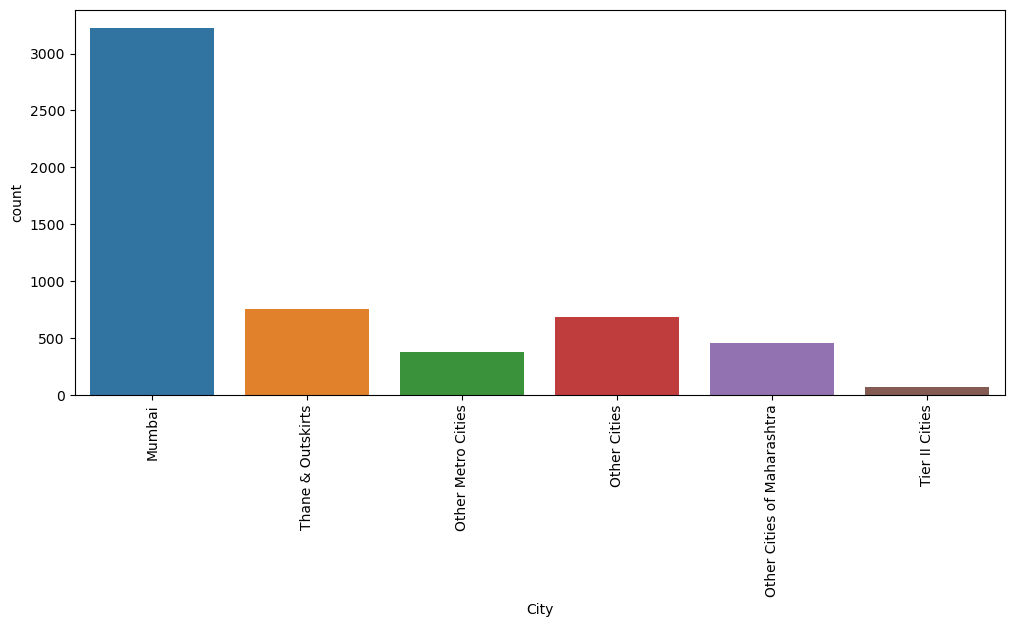

In [17]:
draw_bar_chart('City')

##### Mumbai City is the maximum count , but this may create disparity in the data, so we can drop the city column

In [18]:
df.drop('City', axis = 1, inplace = True)

##### Checking Missing values in Tags which is 36%

In [19]:
feature_value_counts('Tags')

Tags
NaN                                                  36.0
Will revert after reading the email                  22.0
Ringing                                              13.0
Interested in other courses                           6.0
Already a student                                     5.0
Closed by Horizzon                                    4.0
switched off                                          3.0
Busy                                                  2.0
Lost to EINS                                          2.0
Not doing further education                           2.0
Interested  in full time MBA                          1.0
Graduation in progress                                1.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            0.0
number not provided                                   0.0
in touch 

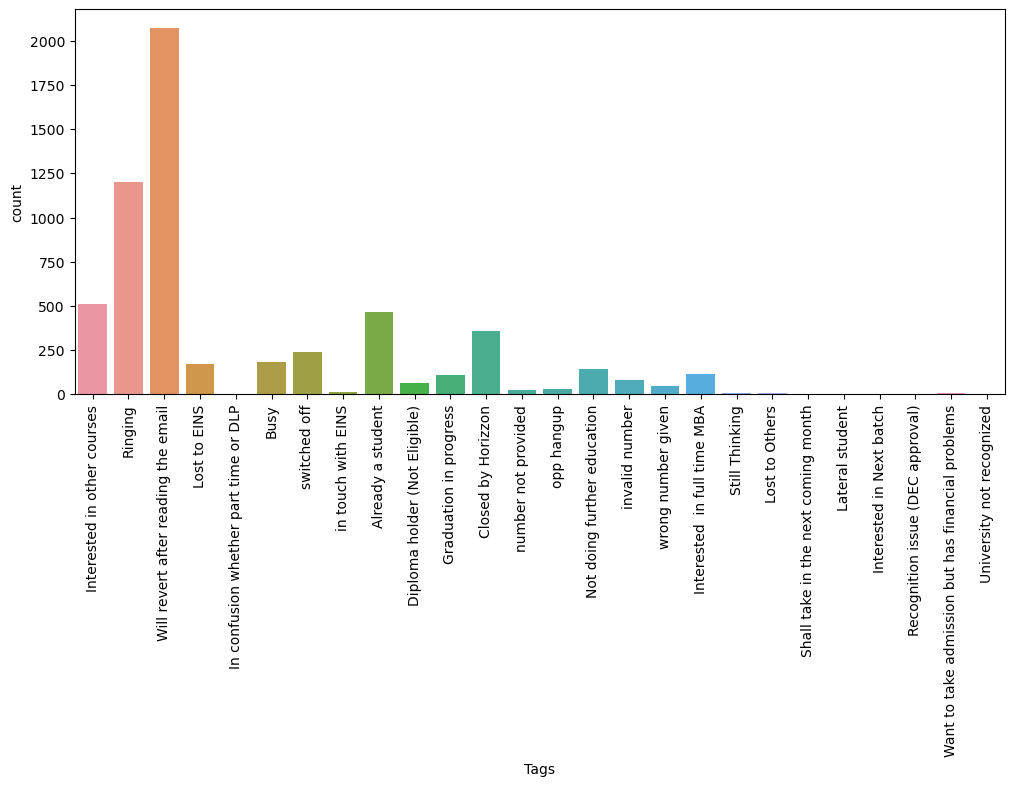

In [20]:
draw_bar_chart('Tags')

##### Most values are `Will revert after reading the email`, hence lets replace missing values with that

In [21]:
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

##### Checking missing values for 'What matters most to you in choosing a course' which is 29%

In [22]:
feature_value_counts('What matters most to you in choosing a course')

What matters most to you in choosing a course
Better Career Prospects      71.0
NaN                          29.0
Flexibility & Convenience     0.0
Other                         0.0
Name: proportion, dtype: float64

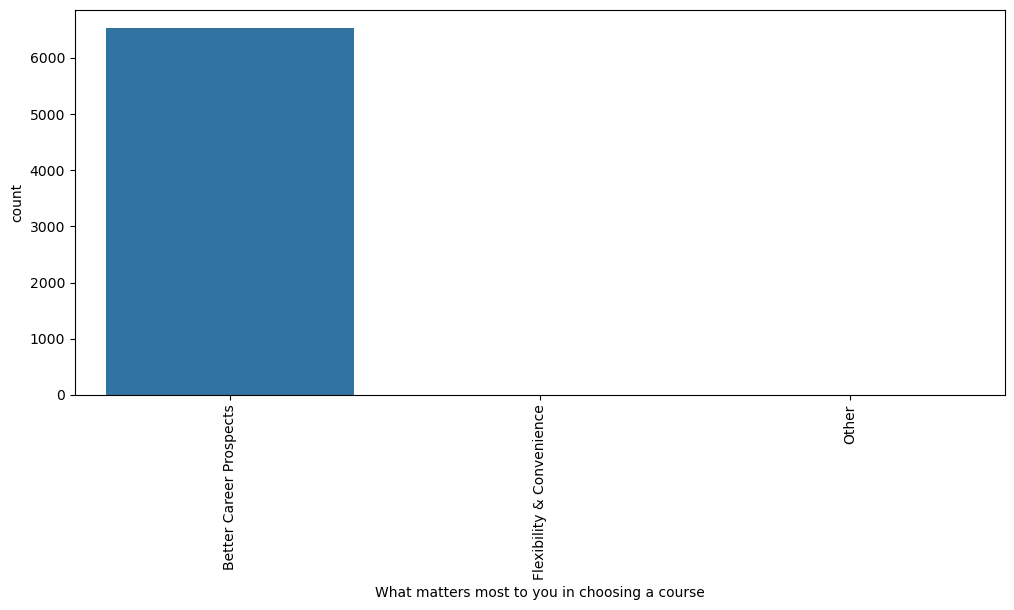

In [23]:
draw_bar_chart('What matters most to you in choosing a course')

##### The feature "What matters most to you in choosing a course" data is unevenly distributed and we cannot draw any conclusions, so lets drop this column

In [24]:
df.drop('What matters most to you in choosing a course',axis = 1, inplace = True)

##### Checking missing values for "What is your current occupation", which is 29%

In [25]:
feature_value_counts('What is your current occupation')

What is your current occupation
Unemployed              61.0
NaN                     29.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

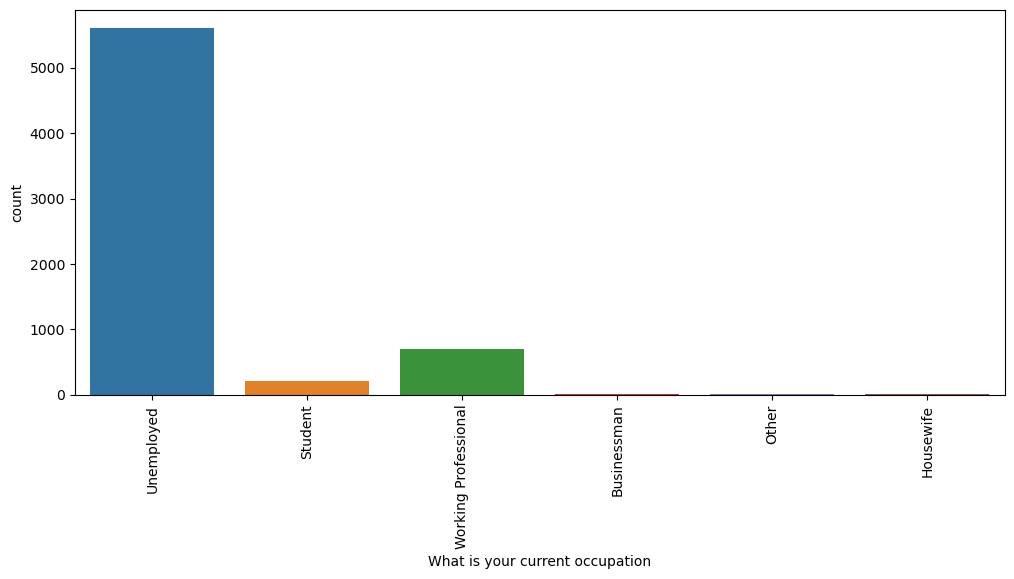

In [26]:
draw_bar_chart('What is your current occupation')

In [27]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

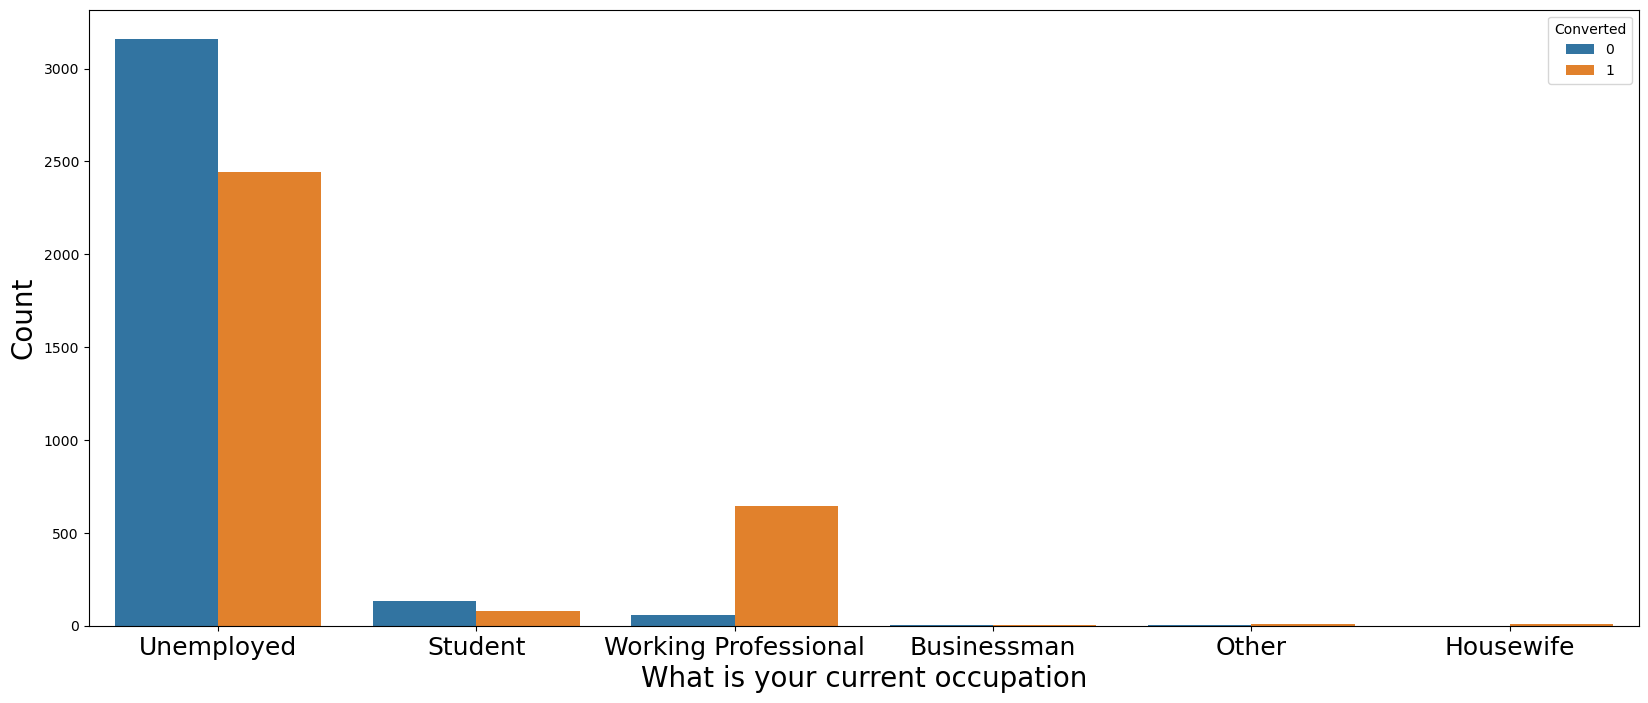

In [28]:
plt.figure(figsize = (20,8))
sns.countplot(x = df['What is your current occupation'], hue = df["Converted"])
plt.xticks(fontsize=18)
plt.xlabel('What is your current occupation', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

- Working Professionals have high conversion rate as compared to others.
- Most of the leads are generated by Unemployeds.

##### The feature "What is your current occupation" data is unevenly distributed and we cannot draw any conclusions, so lets drop this column

In [29]:
df.drop('What is your current occupation',axis = 1, inplace = True)

##### Checking missing values for Country, which is 27%

In [30]:
feature_value_counts('Country')

Country
India                   70.0
NaN                     27.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Bahrain                  0.0
Hong Kong                0.0
Oman                     0.0
France                   0.0
unknown                  0.0
Kuwait                   0.0
South Africa             0.0
Canada                   0.0
Nigeria                  0.0
Germany                  0.0
Sweden                   0.0
Philippines              0.0
Uganda                   0.0
Italy                    0.0
Bangladesh               0.0
Netherlands              0.0
Asia/Pacific Region      0.0
China                    0.0
Belgium                  0.0
Ghana                    0.0
Kenya                    0.0
Sri Lanka                0.0
Tanzania                 0.0
Malaysia                 0.0
Liberia                  0.0
Switze

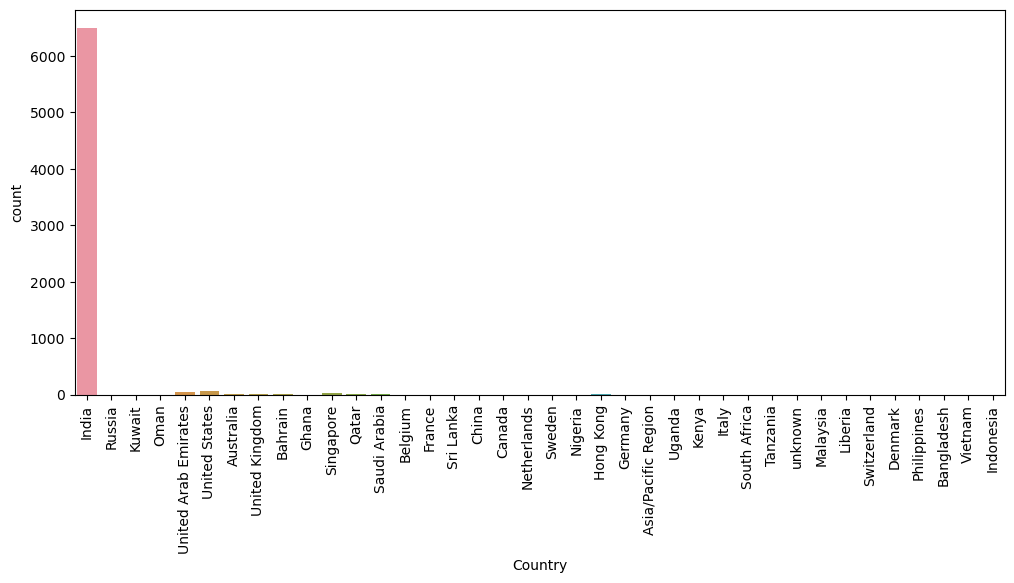

In [31]:
draw_bar_chart('Country')

##### The feature "Country" data is unevenly distributed and we cannot draw any conclusions, so lets drop this column

In [32]:
df.drop('Country',axis = 1, inplace = True)

##### Checking missing values in Specialization, which is 37%

In [33]:
feature_value_counts('Specialization')

Specialization
NaN                                  37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    2.0
Media and Advertising                 2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: proportion, dtype: float64

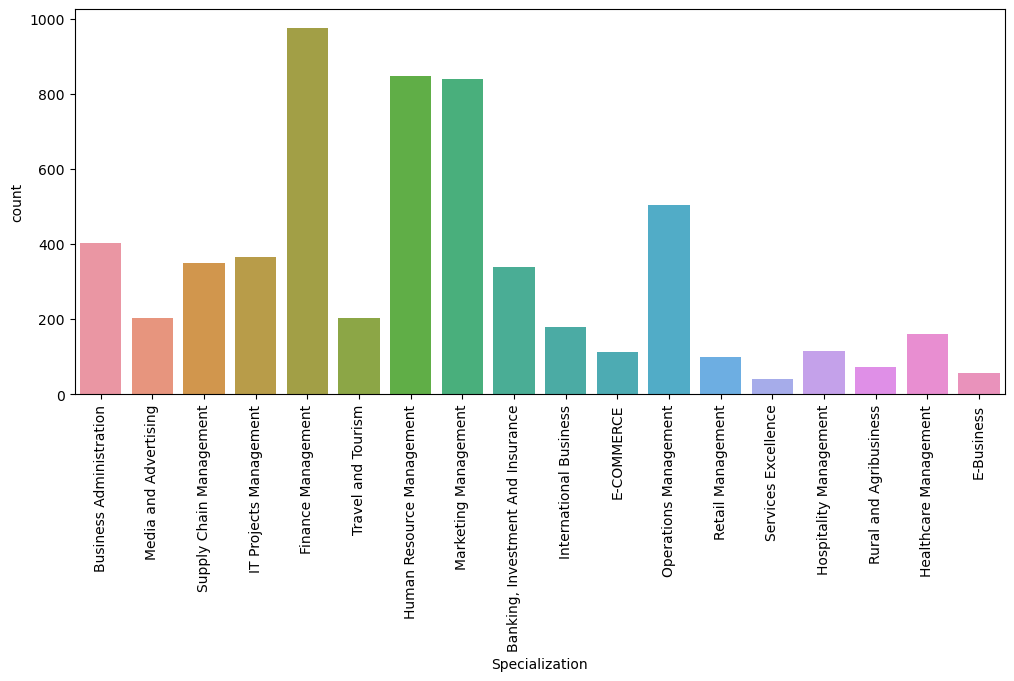

In [34]:
draw_bar_chart('Specialization')

- There can be multiple possibilities for NULL in the specialization column, so we will replace this value with 'Others'
- Possibility of unemployed, student career breaks

In [35]:
df['Specialization'].replace(np.nan, 'Others', inplace = True)

##### Rechecking the NULL values in the dataframe

In [36]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [37]:
df['Lead Source'].value_counts(dropna = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [38]:
#replacing the unique data with relevant category .
df['Lead Source'] =df['Lead Source'].replace('Google','google')
df['Lead Source'] = df['Lead Source'].replace(np.nan,'other')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Social Media','Pay per Click Ads','welearnblog_Home','testone','blog','youtubechannel','NC_EDM','WeLearn'],'other')

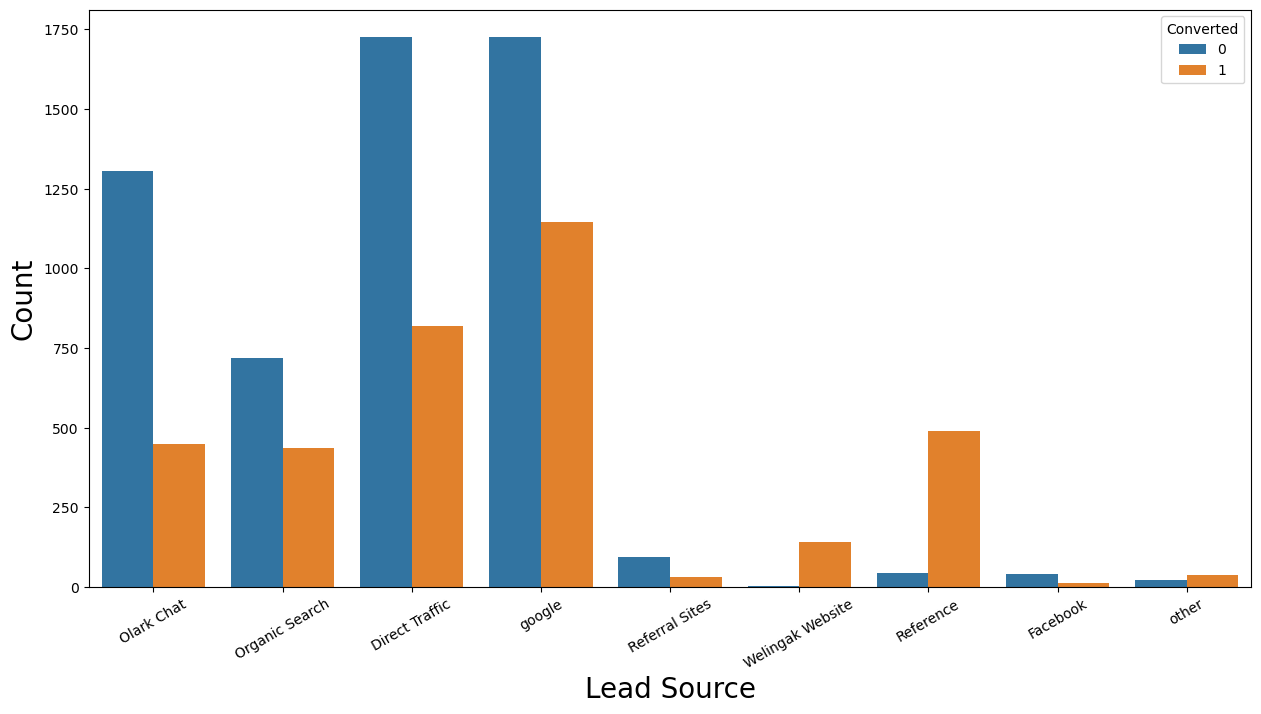

In [39]:
plt.figure(figsize = (15,7.5))
sns.countplot(x = df['Lead Source'], hue = df.Converted)
plt.rcParams.update({'font.size': 8})
plt.xticks(rotation=30)
plt.xlabel('Lead Source', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

##### **Inferences:**

*  Google & Direct traffic generates maximum number of the leads.

*   Conversion rate of the welingak website and reference leads is high.

**To improve the overall lead conversion rate, we should focus on the Organic Search,Olark Chat,Direct Traffic and google leads in the Lead Source and generates more leads. **


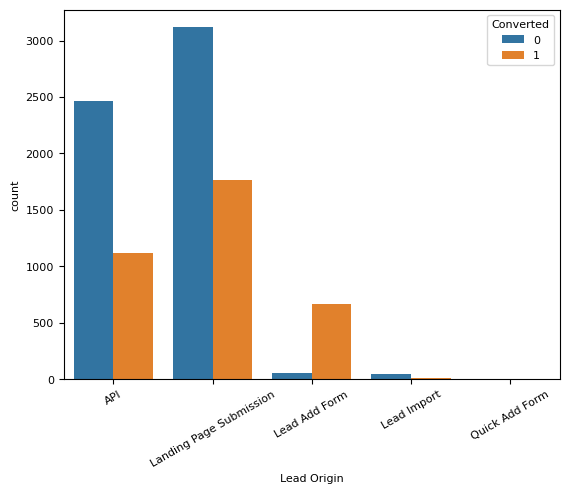

In [40]:
sns.countplot(x = df['Lead Origin'],hue = df.Converted)
plt.rcParams.update({'font.size': 8})
plt.xticks(rotation=30)
plt.show()

 - API and Landing page show a good conversion rate and are good enough in number.<br>
 - While Lead Add form has high conversion rate but do not have enough counts.

##### Remaining missing values are less then 2% se we can remove those columns

In [41]:
df.dropna(inplace=True)

In [42]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

##### Now we have a cleaned dataframe with no missing values

## Removing Unwanted Columns

#### Droping columns that are of no use for modeling

In [43]:
# Dropping Columns
lead = df.drop(['Prospect ID','Lead Number'],axis = 1)

#### Handling columns for unique values having Count=1

In [44]:
#check for columns unique value
lead.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103
unique,4,9,2,2,17,19,2,1,2,2,2,2,2,1,26,1,1,1,2,16
top,Landing Page Submission,google,No,No,Email Opened,Others,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified
freq,4886,2873,8379,9101,3437,3304,9089,9103,9101,9102,9102,9099,9096,9103,5368,9103,9103,9103,6215,3270


##### Below columns have only 1 unique value, so lets drop them as they would not be useful 
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [45]:
lead = lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1)

## Exploratory Data Analysis

#### Checking for duplicates:

In [46]:
df[df.duplicated]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### There is no duplicate data present in our dataset

#### Checking the categorical data and their stats

In [47]:
def count_categorical_values(feature):
    plt.figure(figsize=(8,4))
    sns.countplot(data = lead, x = feature)
    plt.xticks(rotation = 90)
    plt.show()

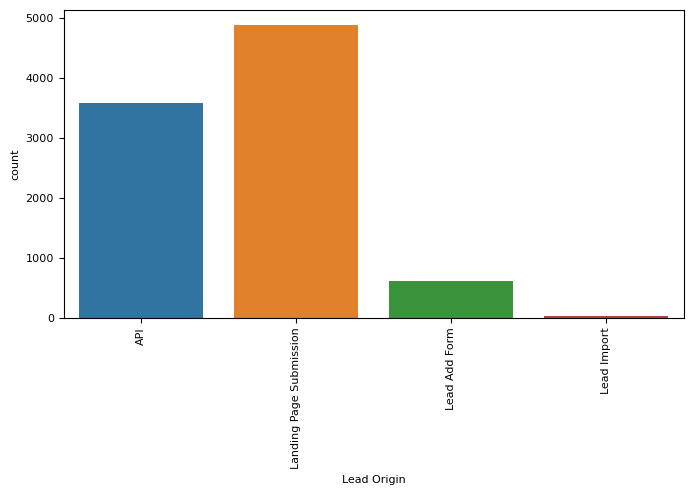

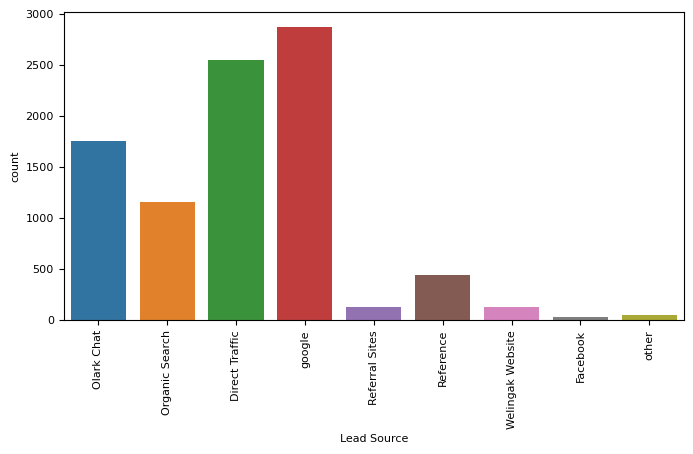

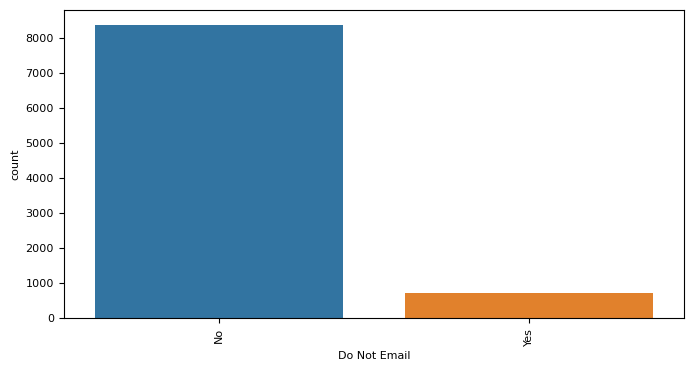

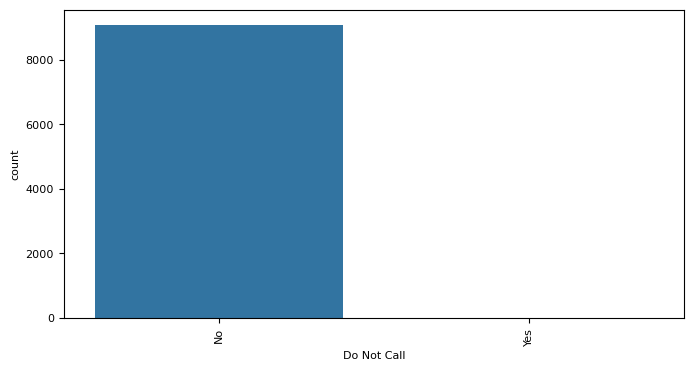

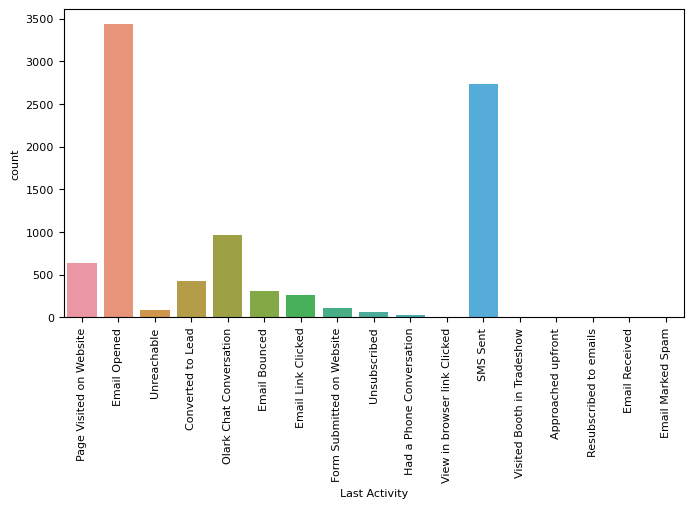

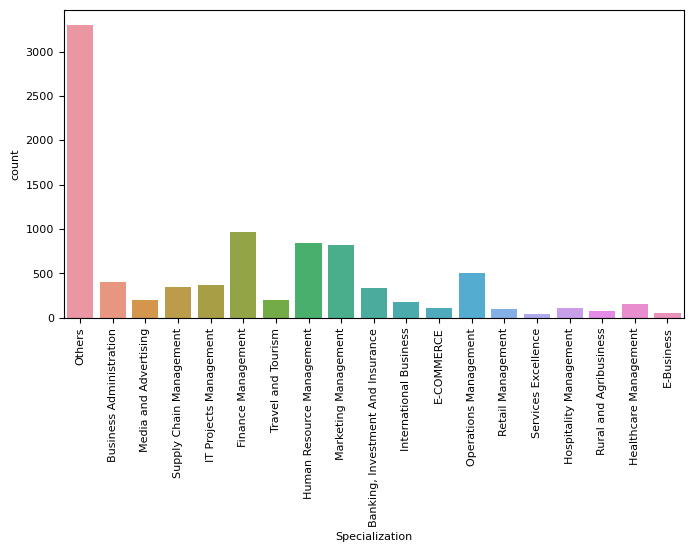

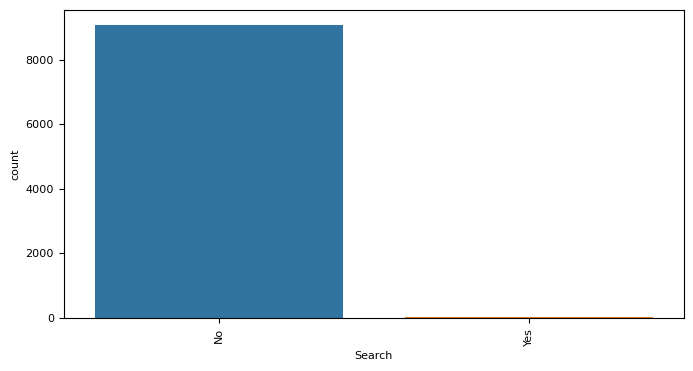

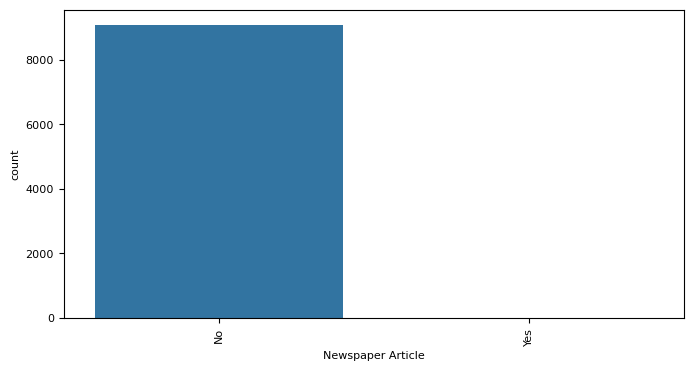

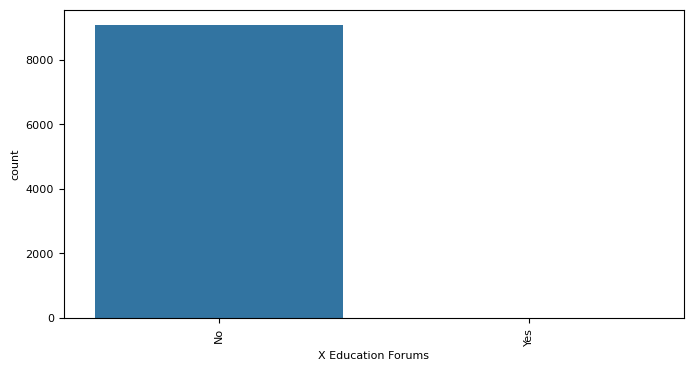

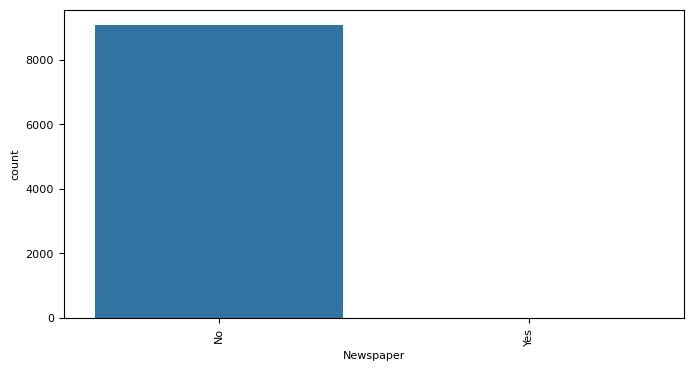

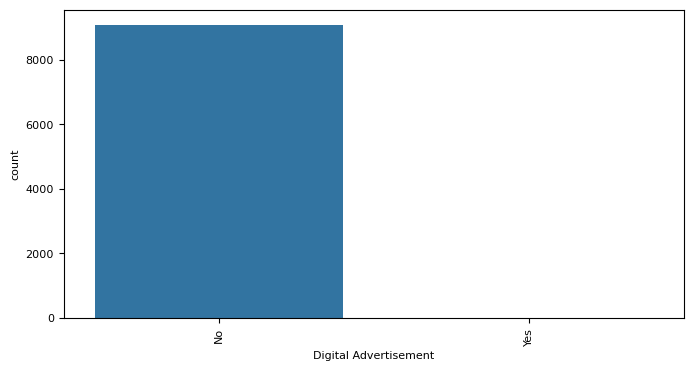

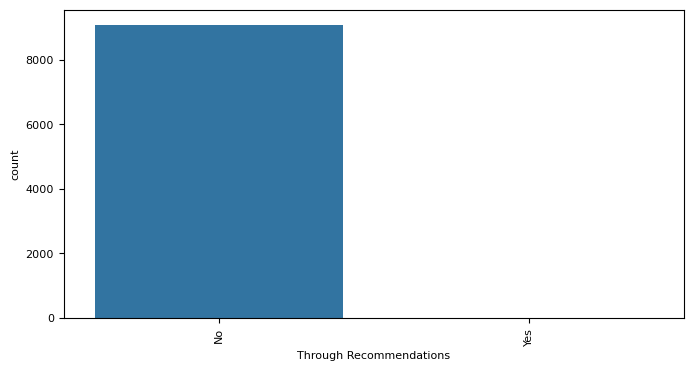

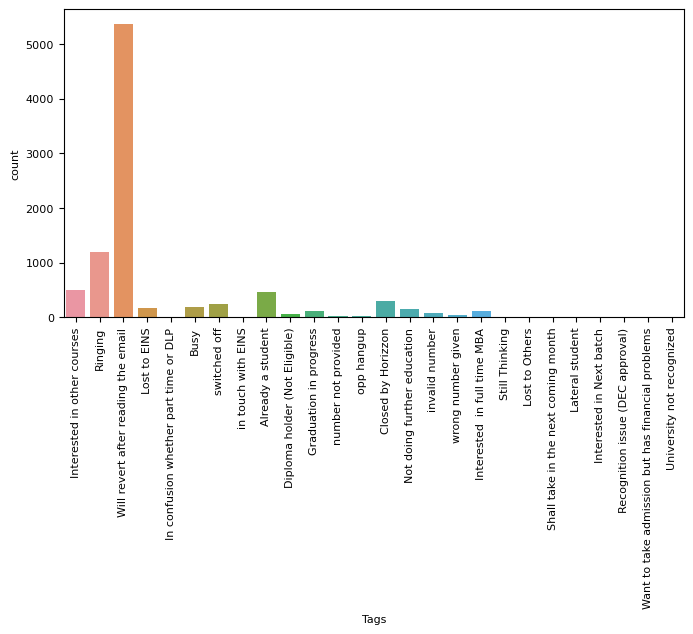

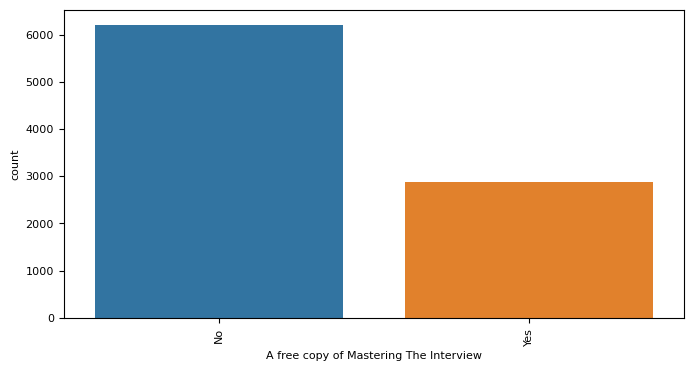

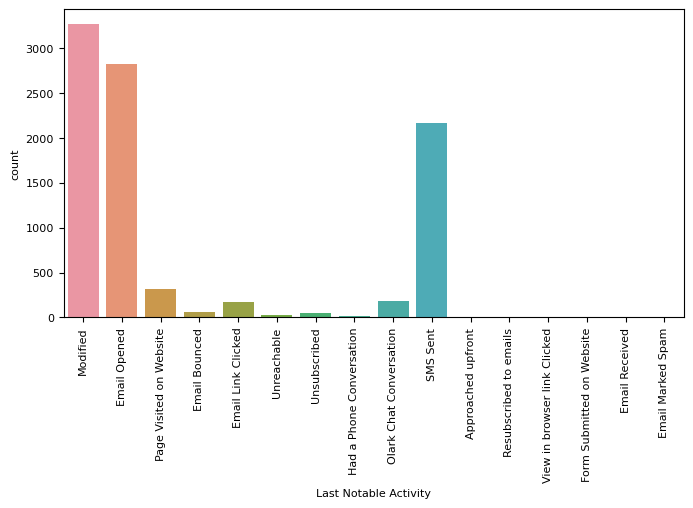

In [48]:
catog_col = lead.select_dtypes(include=['category', 'object']).columns.tolist()
for i in catog_col:
    count_categorical_values(i)

#### The plots show skewed data in the below columns, hence let us drop these columns
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

In [49]:
lead.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],axis = 1,inplace = True)

In [50]:
lead.shape

(9103, 12)

In [51]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   object 
 

#### Grouping Low Frequency Values`

In [52]:
categoric_data = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'Tags', 
                  'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in categoric_data:
    print('Value Count of:')
    data = lead[i].value_counts(normalize=True)*100
    print(data,'\n')
    print("=="*40)

Value Count of:
Lead Origin
Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: proportion, dtype: float64 

Value Count of:
Lead Source
google              31.561024
Direct Traffic      27.935845
Olark Chat          19.257388
Organic Search      12.677139
Reference            4.866528
Welingak Website     1.417115
Referral Sites       1.373174
other                0.571240
Facebook             0.340547
Name: proportion, dtype: float64 

Value Count of:
Do Not Email
No     92.046578
Yes     7.953422
Name: proportion, dtype: float64 

Value Count of:
Last Activity
Email Opened                    37.756783
SMS Sent                        30.077996
Olark Chat Conversation         10.677799
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.427442
Email Link Clicked               2.933099
Form Submitted on Website        1

- <b>google</b> and <b>Google</b> are the same values, only <b>Case</b> is different, so we will merge them
- Grouping low frequency value to 'Other' 

In [53]:
lead['Lead Source'].replace('google','Google', inplace=True)

df['Lead Source'].value_counts(dropna = False)

Lead Source
google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
other                 52
Facebook              31
Name: count, dtype: int64

In [54]:
lead['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','Click2call','Press_Release','Social Media','Live Chat',
                             'youtubechannel','testone','Pay per Click Ads','welearnblog_Home',
                             'WeLearn','blog','NC_EDM'], 'Others', inplace = True)

lead['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Marked Spam ',
                              'Email Received ','Approached upfront','View in browser link Clicked',
                               'Had a Phone Conversation','Unsubscribed','Unreachable','Form Submitted on Website'],
                             'Others', inplace=True)

lead['Specialization'].replace(['International Business','Healthcare Management','Retail Management','E-COMMERCE',
                               'Hospitality Management','Rural and Agribusiness','E-Business','Services Excellence'],
                              'Others', inplace=True)

lead['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','in touch with EINS',
                      'number not provided','Lost to Others','Still Thinking','Want to take admission but has financial problems',
                     'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                     'University not recognized','Recognition issue (DEC approval)'], 'Others', inplace=True)

lead['Last Notable Activity'].replace(['Email Link Clicked ','Email Bounced','Unsubscribed','Unreachable',
                                       'Had a Phone Conversation','Email Marked Spam','Approached upfront',
                                      'Resubscribed to emails','View in browser link Clicked','Email Received',
                                      'Form Submitted on Website'], 'Others', inplace=True)

In [55]:
categoric_data = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'Tags', 
                  'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in categoric_data:
    print('Value Count of:')
    data = lead[i].value_counts(normalize=True)*100
    print(data,'\n')
    print("=="*40)

Value Count of:
Lead Origin
Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: proportion, dtype: float64 

Value Count of:
Lead Source
Google            31.561024
Direct Traffic    27.935845
Olark Chat        19.257388
Organic Search    12.677139
Reference          4.866528
Others             3.130836
other              0.571240
Name: proportion, dtype: float64 

Value Count of:
Do Not Email
No     92.046578
Yes     7.953422
Name: proportion, dtype: float64 

Value Count of:
Last Activity
Email Opened               37.756783
SMS Sent                   30.077996
Olark Chat Conversation    10.677799
Page Visited on Website     7.030649
Converted to Lead           4.701747
Email Bounced               3.427442
Others                      3.350544
Email Link Clicked          2.933099
Email Received              0.021971
Email Marked Spam           0.021971
Name: proportion, dtype: float64

#### Checking for outliers in  numerical Data

In [56]:
numeric_data = []
for i in lead.columns:
    if i not in catog_col and i != 'Converted':
        numeric_data.append(i)
        
numeric_data

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

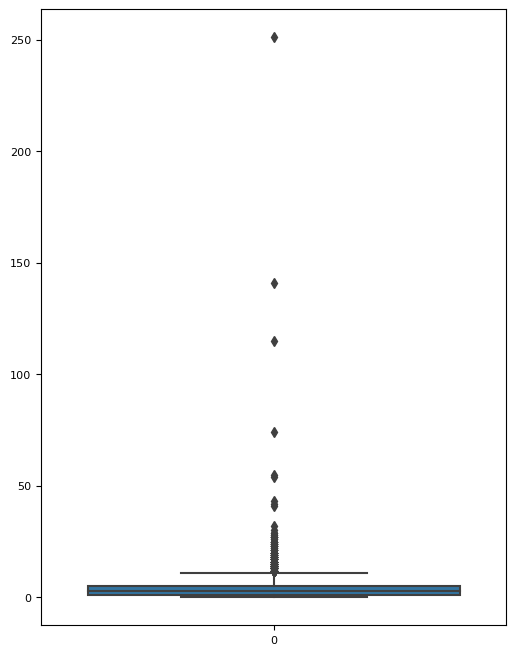

In [57]:
plt.figure(figsize=[6,8]) 
sns.boxplot(lead['TotalVisits'], orient='v')
plt.show()

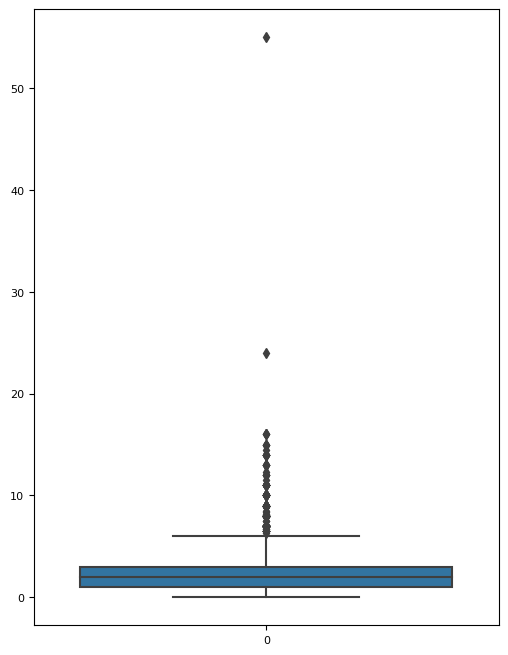

In [58]:
plt.figure(figsize=[6,8]) 
sns.boxplot(lead['Page Views Per Visit'], orient='v')
plt.show()

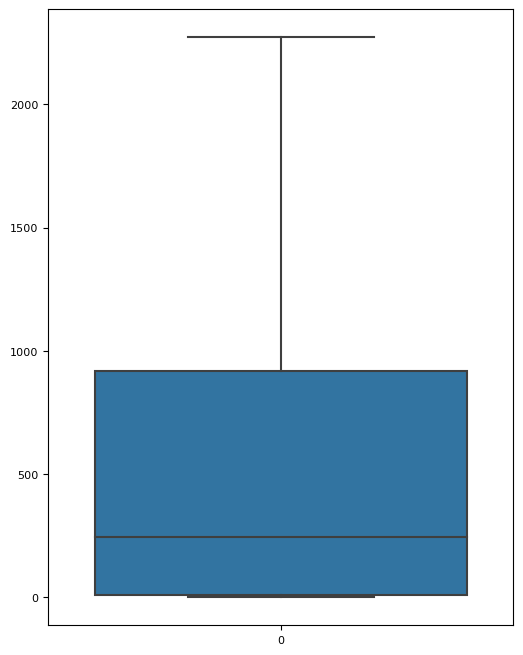

In [59]:
plt.figure(figsize=[6,8]) 
sns.boxplot(lead['Total Time Spent on Website'], orient='v')
plt.show()

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

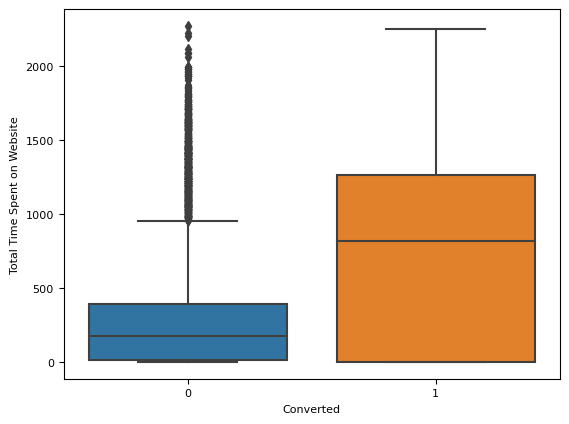

In [60]:
sns.boxplot(x = df.Converted,y = df['Total Time Spent on Website'])

<Axes: xlabel='Page Views Per Visit'>

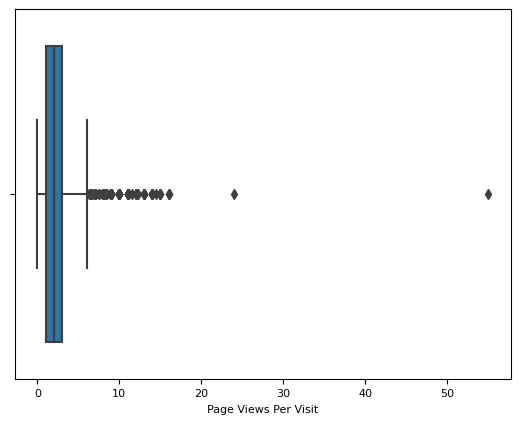

In [61]:
sns.boxplot(x = df['Page Views Per Visit'])

- <b>TotalVisits</b> and <b>Page View Per Visit</b>. Both the variables contains outliers 

In [62]:
df['Page Views Per Visit'].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [63]:
limit = df['Page Views Per Visit'].quantile(0.95)
df = df[df['Page Views Per Visit']<=limit]

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

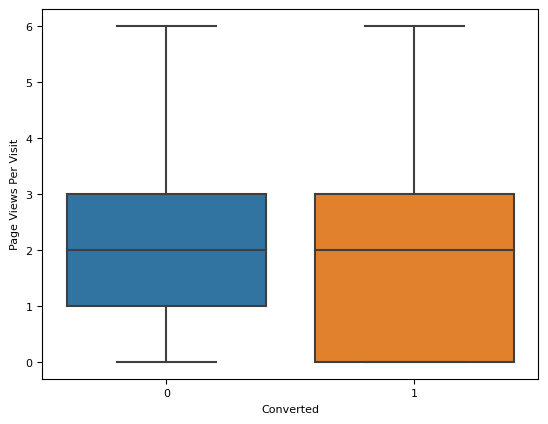

In [64]:
sns.boxplot(x = df.Converted,y = df['Page Views Per Visit'])

In [65]:
lead.describe([.1,.25,.5,.75,.9])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
max,1.000000,251.000000,2272.000000,55.000000


In [66]:
df.Specialization.value_counts()

Specialization
Others                               3254
Finance Management                    923
Human Resource Management             798
Marketing Management                  789
Operations Management                 483
Business Administration               380
IT Projects Management                350
Supply Chain Management               326
Banking, Investment And Insurance     308
Media and Advertising                 191
Travel and Tourism                    178
International Business                165
Healthcare Management                 144
Hospitality Management                104
E-COMMERCE                            100
Retail Management                      92
Rural and Agribusiness                 67
E-Business                             53
Services Excellence                    38
Name: count, dtype: int64

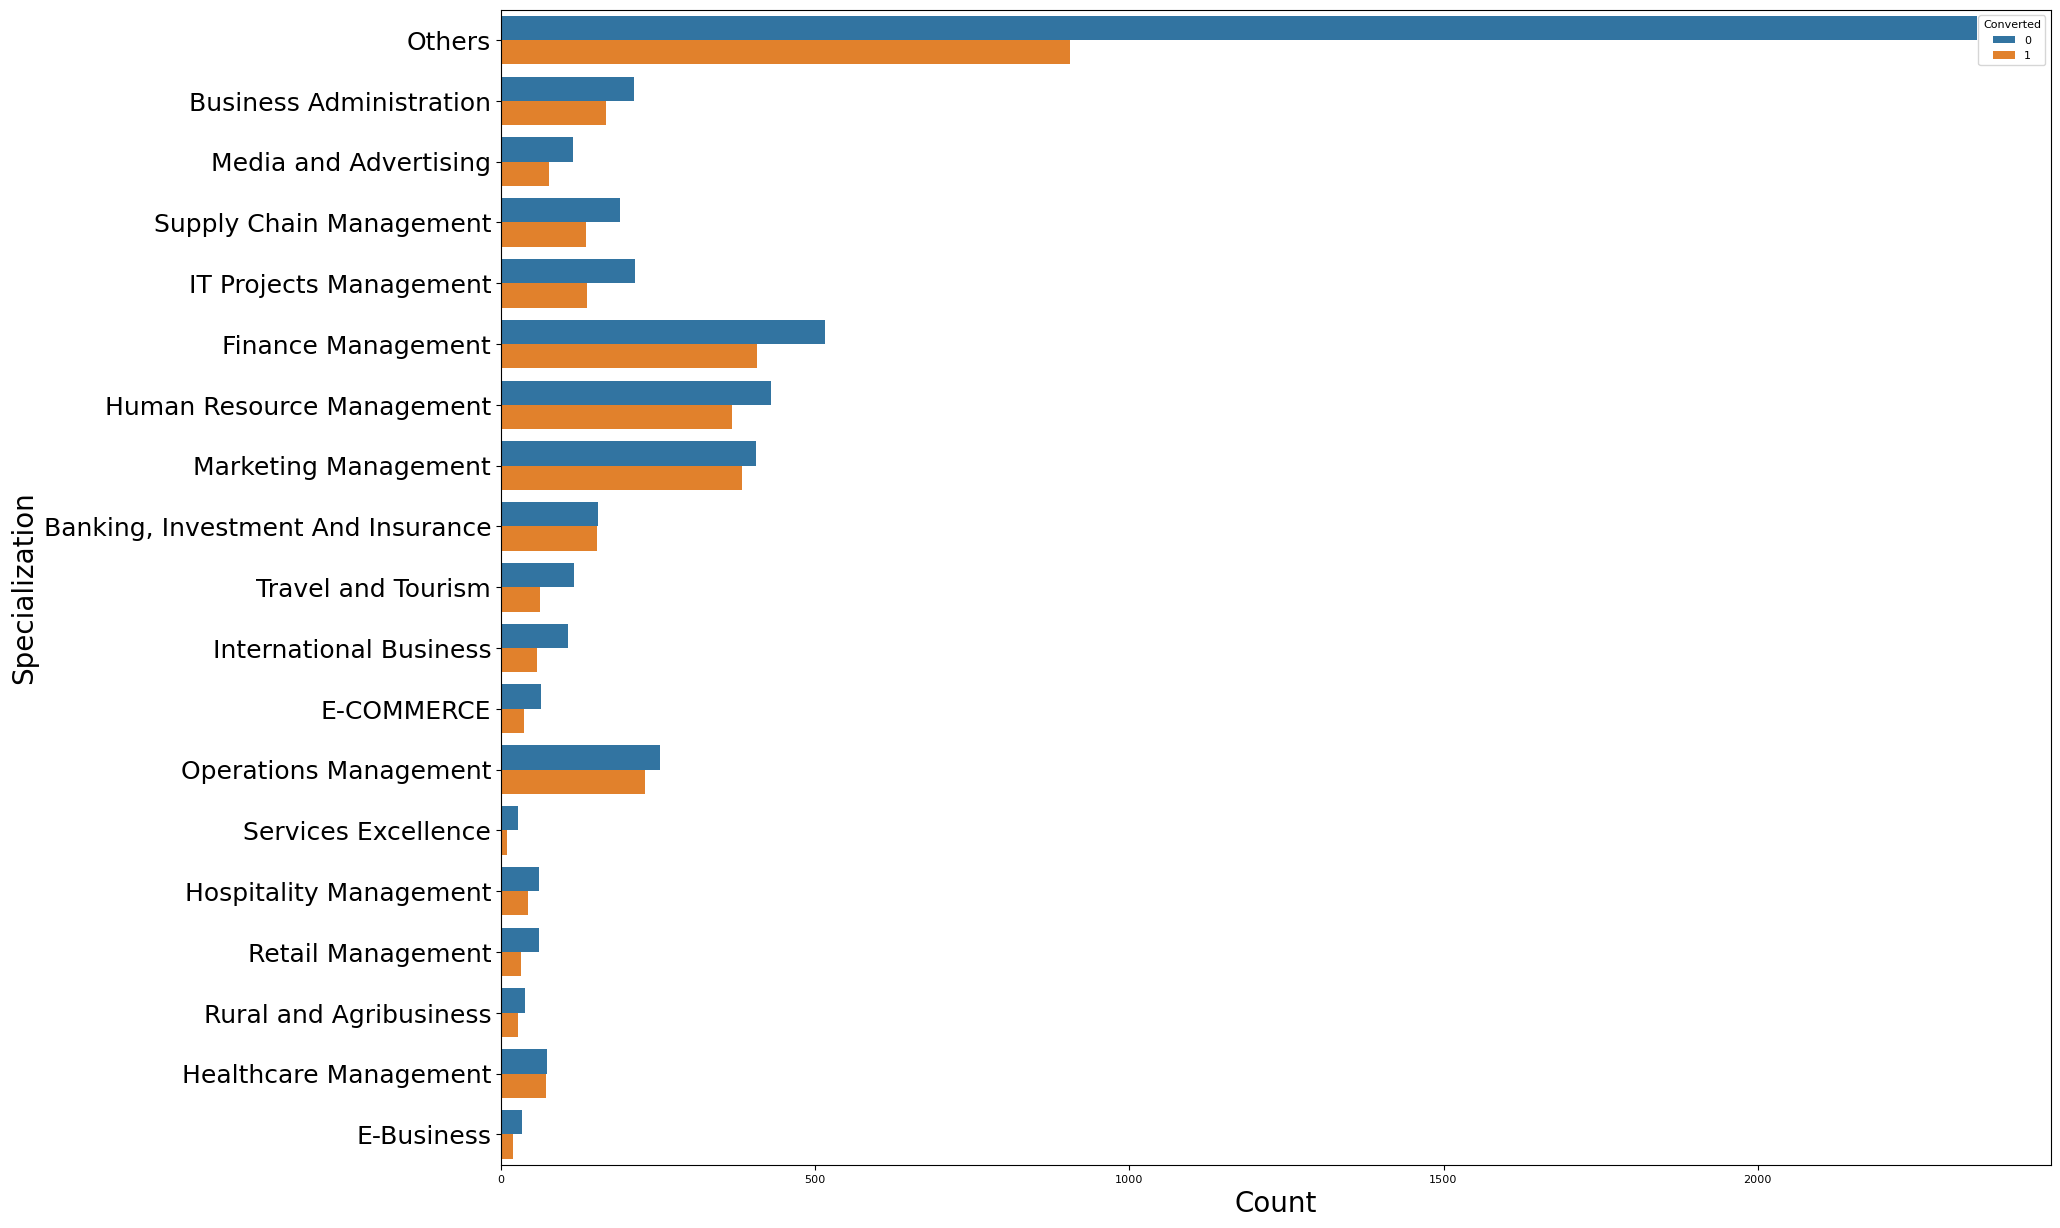

In [67]:
plt.figure(figsize = (20,15))
sns.countplot(y = df["Specialization"], hue = df["Converted"])
plt.xlabel('Count', size = 20)
plt.ylabel('Specialization', size = 20)
plt.yticks(fontsize=18)
plt.show()

In [68]:
df['Do Not Email'].value_counts()

Do Not Email
No     8061
Yes     682
Name: count, dtype: int64

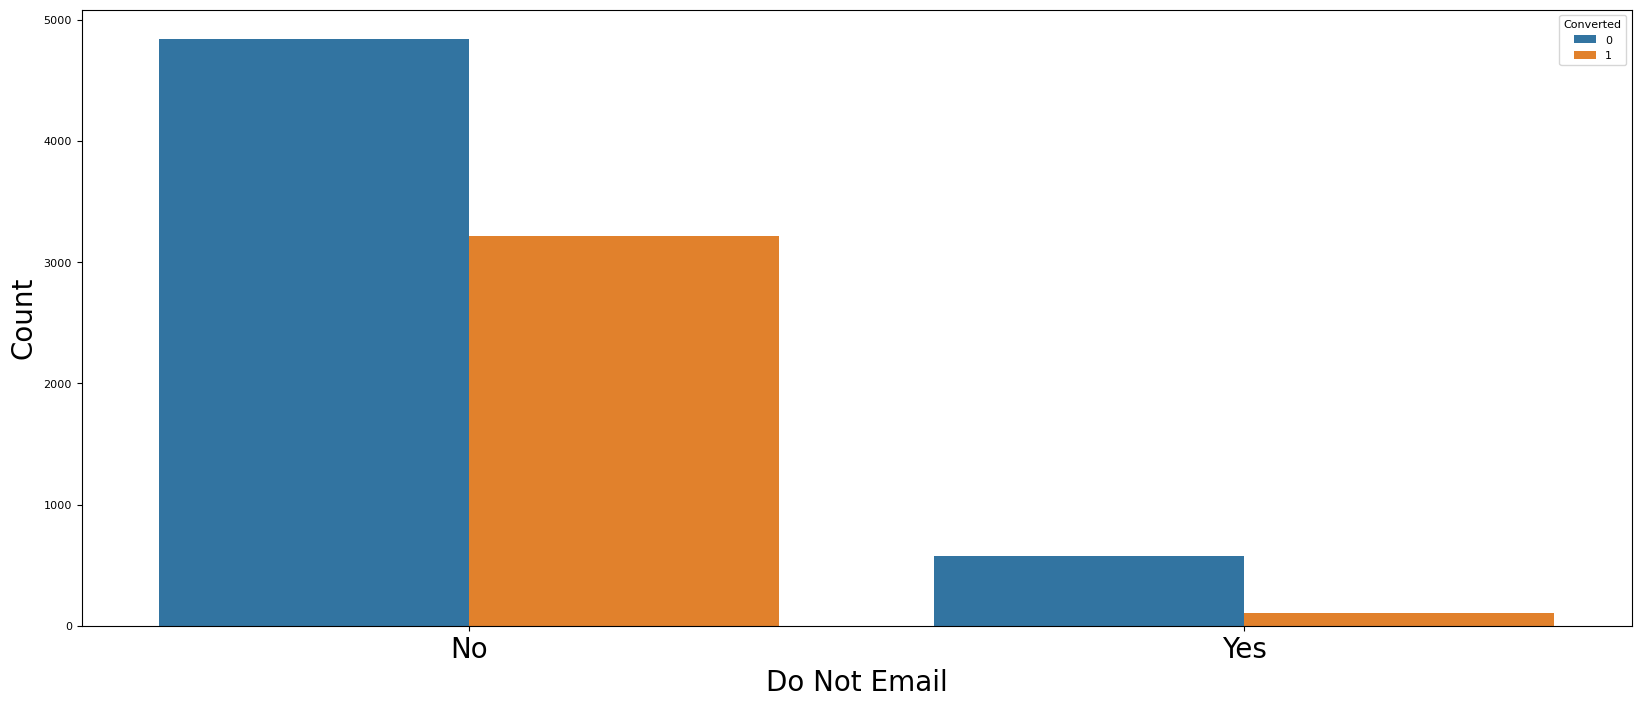

In [69]:
plt.figure(figsize = (20,8))
sns.countplot(x = df['Do Not Email'],hue = df.Converted)
plt.xticks(fontsize=20)
plt.xlabel('Do Not Email', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

##### Treating Outliers

In [70]:
def outlier_corrections(data,feature):
    for i in feature:
        q1 = data[i].describe()['25%']
        q3 = data[i].describe()['75%']
        iqr = q3 - q1
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr
        data[i] = np.where(data[i] > upper_bound, upper_bound, data[i])  
        data[i] = np.where(data[i] < lower_bound, lower_bound, data[i])

In [71]:
outlier_feature = ['TotalVisits', "Page Views Per Visit"]
outlier_corrections(lead, outlier_feature)

In [72]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.220696,481.350104,2.258944
std,0.485464,2.881792,545.066142,1.792536
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,11.000000,2272.000000,6.000000


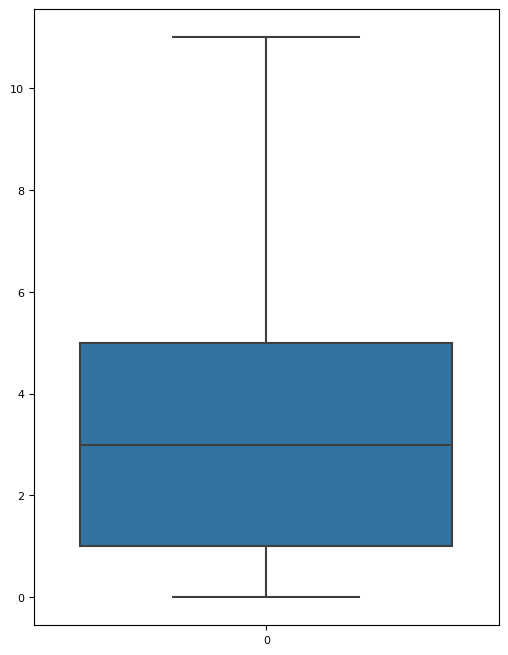

In [73]:
# Recheck the outliers in the 'TotalVisits' column, after the addressing the outliers
plt.figure(figsize=[6,8]) 
sns.boxplot(lead.TotalVisits, orient='v')
plt.show()

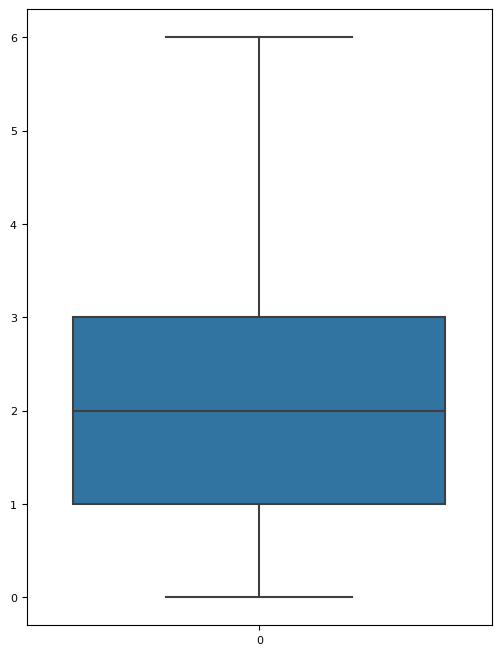

In [74]:
# Recheck the outliers in the 'Page Views Per Visit' column, after the addressing the outliers
plt.figure(figsize=[6,8]) 
sns.boxplot(lead['Page Views Per Visit'], orient='v')
plt.show()

In [75]:
# sns.pairplot(lead,hue='Converted')
# plt.show()

#### Converting Yes and No to 0 and 1

In [76]:
var = ['Do Not Email','A free copy of Mastering The Interview']

lead[var] = lead[var].apply(lambda x:x.map({'Yes':1,'No':0})) 

### Creating Dummy Variables for Objects

In [77]:
lead = pd.get_dummies(lead, drop_first=True).astype(float)

In [78]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.0,674.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,1532.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,305.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,2.0,1428.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Train Test Split

In [79]:
# Importig Required Libraries

from sklearn.model_selection import train_test_split

In [80]:
X = lead.drop('Converted',axis = 1)
y = lead['Converted']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=37)

### Feature Scaling using MinMaxScaler()

In [82]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.0,674.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,1532.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,305.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,2.0,1428.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

maxvar = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[maxvar] = scaler.fit_transform(X_train[maxvar])

In [84]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5626,0.0,0.272727,0.116197,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8008,0.0,0.181818,0.396127,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2486,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8885,0.0,0.363636,0.589789,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3170,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Looking for correlation

In [85]:
lead.corr() >0.8

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Do Not Email,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Converted,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TotalVisits,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Time Spent on Website,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Page Views Per Visit,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A free copy of Mastering The Interview,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lead Origin_Landing Page Submission,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lead Origin_Lead Add Form,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Lead Origin_Lead Import,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Lead Source_Google,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

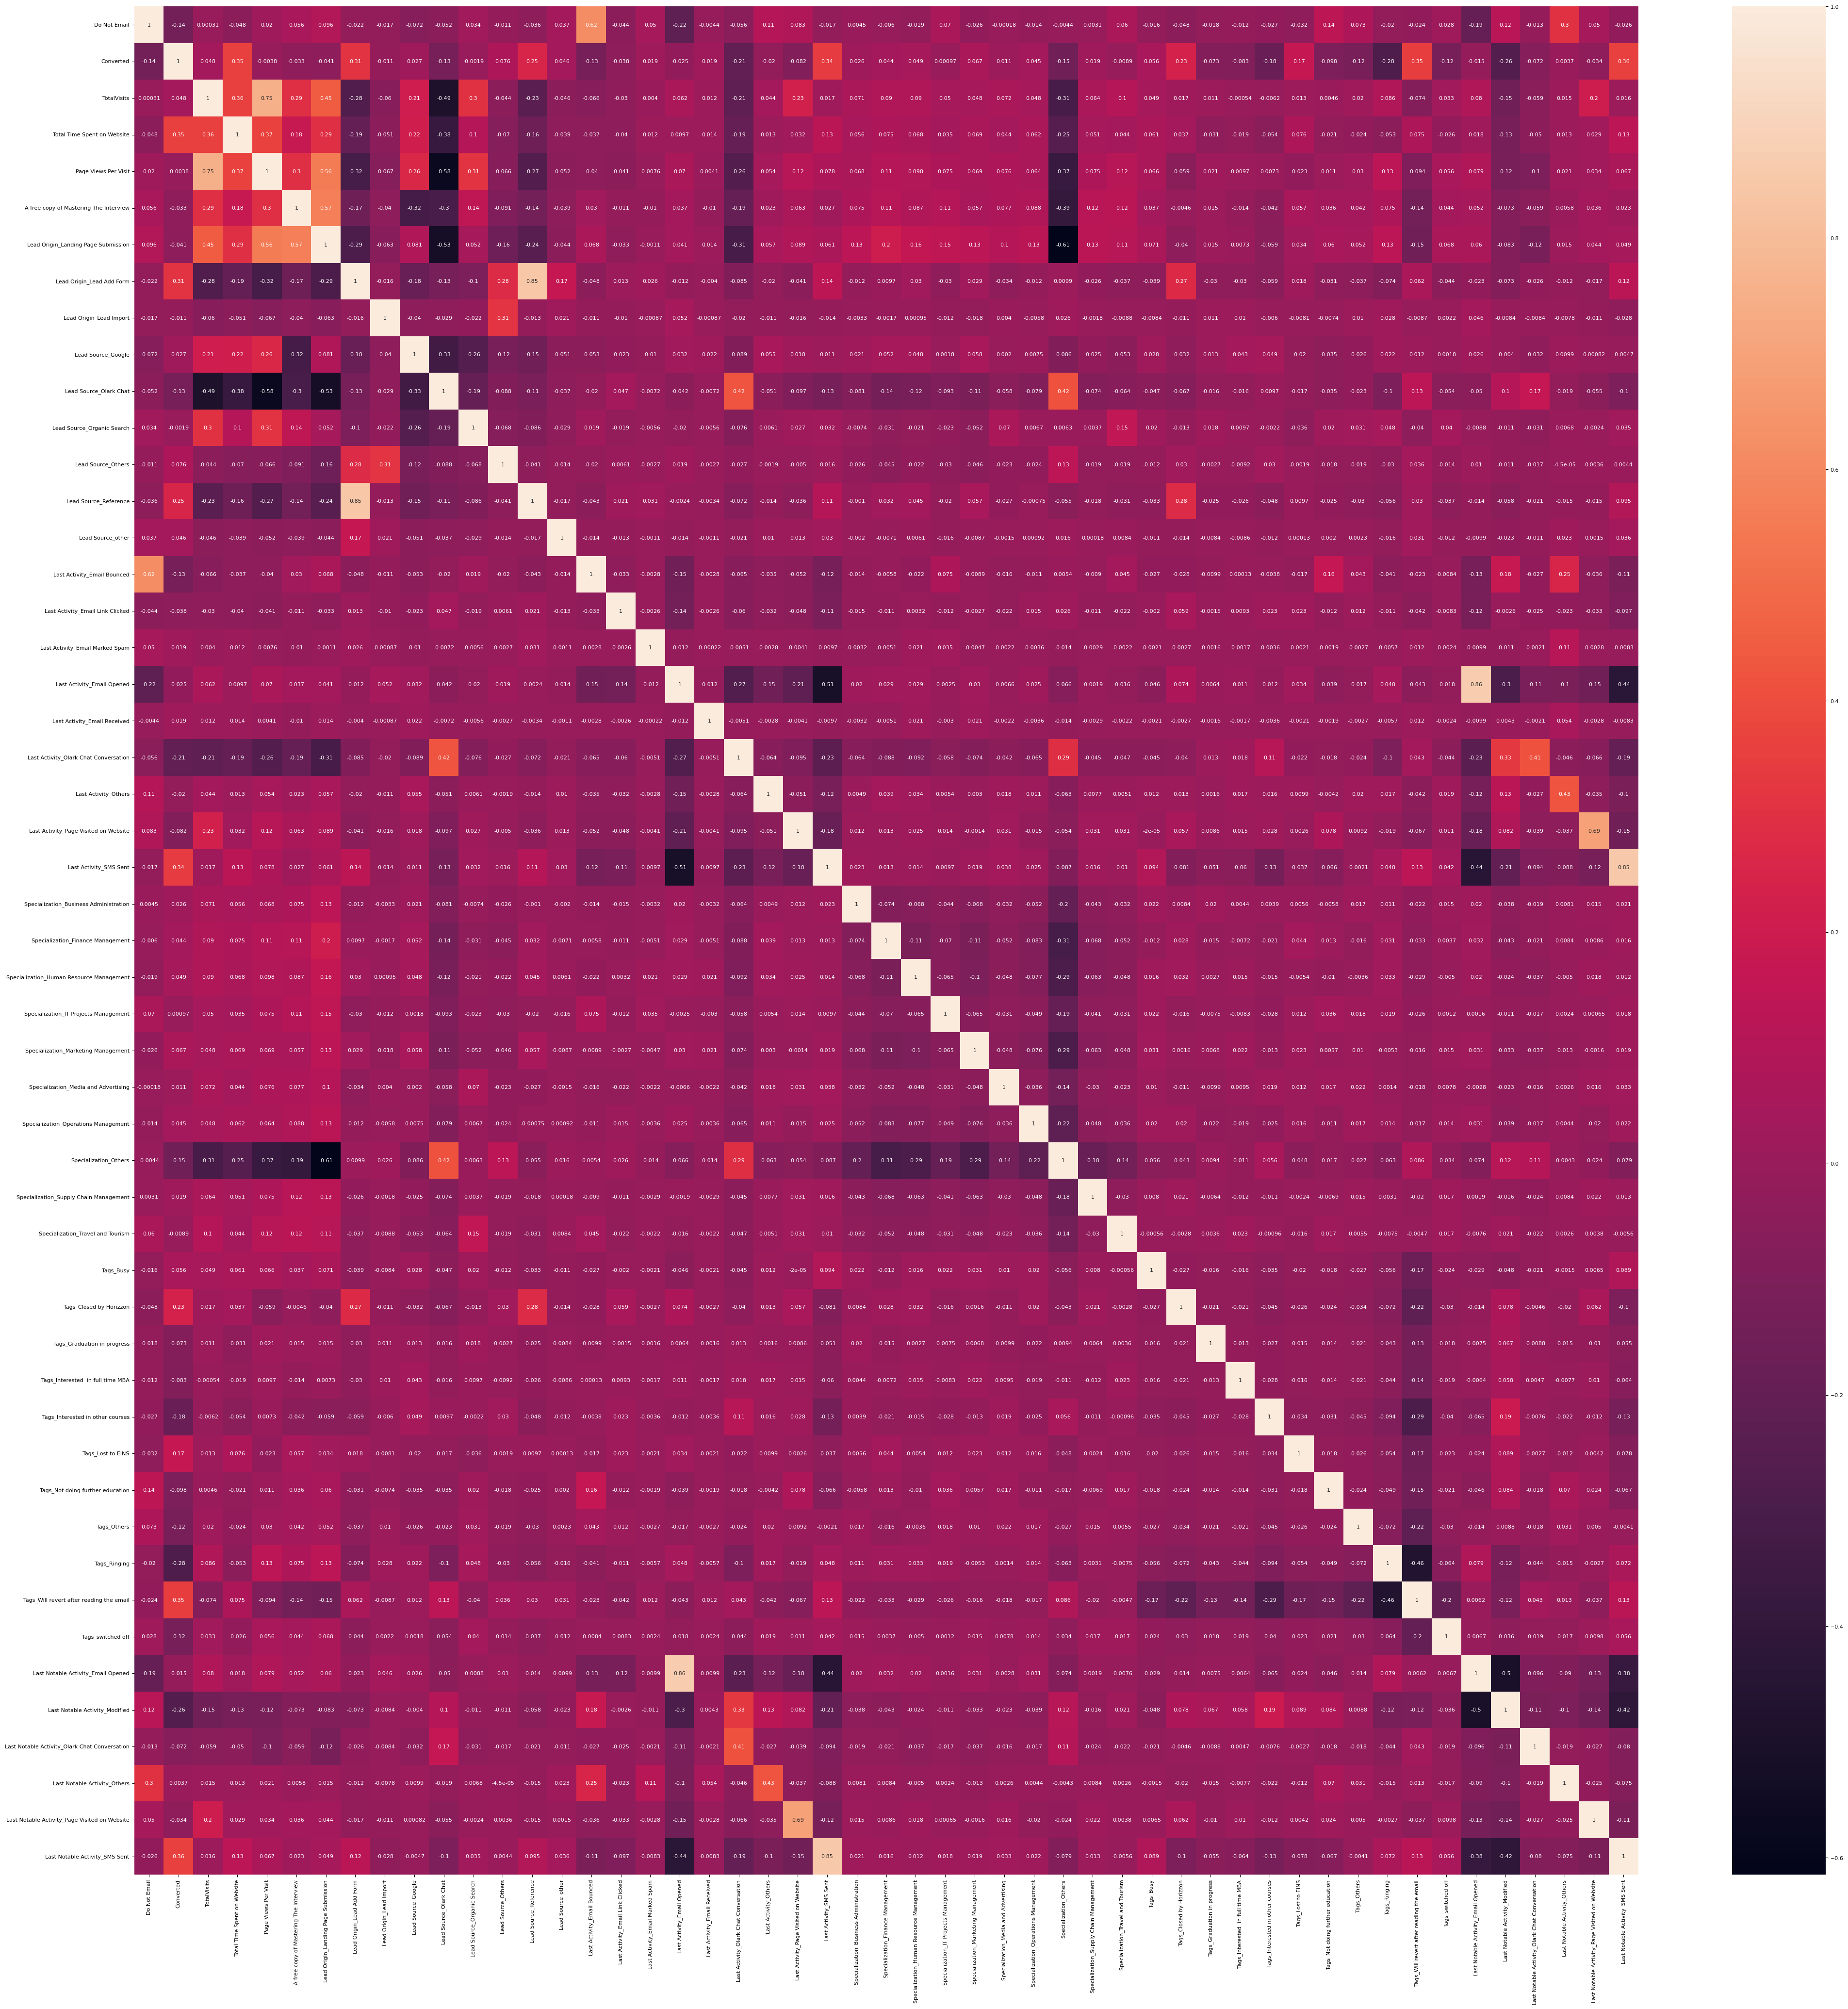

In [86]:
plt.figure(figsize=(50,50))
sns.heatmap(lead.corr(),annot=True)


In [87]:
high_correlation = ['Lead Source_Reference','Lead Origin_Lead Add Form',
                    'Last Notable Activity_Email Opened','Last Activity_Email Opened',
                   'Last Activity_SMS Sent','Last Notable Activity_SMS Sent']

<Axes: >

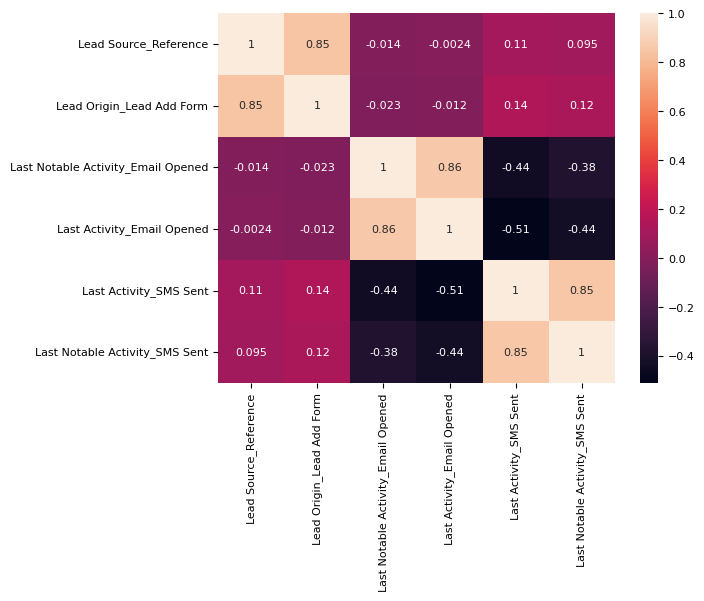

In [88]:
sns.heatmap(lead[high_correlation].corr(),annot = True)

#### These features are highly correlated, so these should be removed

In [89]:
X_train.drop(high_correlation,axis = 1, inplace=True)
X_test.drop(high_correlation,axis = 1, inplace=True)

## Feature Selection Using RFE

In [90]:
# importing necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [91]:
regexp = LogisticRegression()

rfe = RFE(regexp, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [92]:
# Checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', True, 1),
 ('Lead Source_other', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False, 16),
 ('Last Activity_Email Received', False, 10),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', False, 8),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_Finance Management', False, 15),
 ('Specialization_Human Resource Management', False, 24),
 ('Specialization_IT Projects Manag

In [93]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Others', 'Lead Source_other',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [94]:
# Defining a function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

## Model-1

In [95]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# Building model using statsmodels, for the detailed statistics

# Taking the columns that were selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant Cariable
X_train_sm1 = sm.add_constant(X_train_rfe)

logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2099.1
Date:                Tue, 16 Jan 2024   Deviance:                       4198.2
Time:                        06:58:27   Pearson chi2:                 7.86e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4901
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.4958      0.236    -10.573      0.000      -2.958      -2.033
Total Time Spent on Website                       4.0392      0.185     21.849      0.000       3.677       4.402
Lead Origin_Landing Page Submission              -1.3486      0.108    -12.528      0.000      -1.560      -1.138
Lead Source_Others                                1.0959      0.210      5.219      0.000       0.684       1.507
Lead Source_other                                 1.5201      0.523      2.905      0.004       0.495       2.546
Last Activity_Email Bounced                      -2.5019      0.447     -5.597      0.000      -3.378      -1.626
Last Activity_Email Link Clicked                 -1.1922      0.243     -4.900      0.000      -1.669      -0.715
Last Activity_Olark Chat Conversation            -1.1694      0.214     -5.472      0.000      -1.588      -0.751
Specialization_Others                            -1.1746      0.101    -11.596      0.000      -1.373      -0.976
Tags_Busy                                         3.3351      0.298     11.173      0.000       2.750       3.920
Tags_Closed by Horizzon                           9.0830      0.753     12.060      0.000       7.607      10.559
Tags_Graduation in progress                       1.5580      0.478      3.258      0.001       0.621       2.495
Tags_Interested  in full time MBA               -21.5799   2.13e+04     -0.001      0.999   -4.18e+04    4.18e+04
Tags_Lost to EINS                                 7.8143      0.578     13.519      0.000       6.681       8.947
Tags_Not doing further education                -21.3831   1.81e+04     -0.001      0.999   -3.54e+04    3.54e+04
Tags_Ringing                                     -0.5827      0.300     -1.946      0.052      -1.170       0.004
Tags_Will revert after reading the email          3.6838      0.221     16.642      0.000       3.250       4.118
Tags_switched off                                -1.0120      0.637     -1.588      0.112      -2.261       0.237
Last Notable Activity_Modified                   -1.6277      0.098    -16.548      0.000      -1.821      -1.435
Last Notable Activity_Olark Chat Conversation    -1.8393      0.413     -4.456      0.000      -2.648      -1.030
Last Notable Activity_Page Visited on Website    -1.6599      0.227     -7.318      0.000      -2.104      -1.215
=================================================================================================================
"""

In [97]:
get_vif(X_train_sm1)

,Features,VIF
0,const,15.27
1,Tags_Will revert after reading the email,2.26
2,Lead Origin_Landing Page Submission,1.85
3,Tags_Ringing,1.78
4,Last Activity_Olark Chat Conversation,1.69
5,Specialization_Others,1.68
6,Last Notable Activity_Modified,1.42
7,Last Notable Activity_Olark Chat Conversation,1.33
8,Tags_Closed by Horizzon,1.25
9,Total Time Spent on Website,1.17


- <b>Tags_Not doing further education</b> has very high p-value(0.999), so lets drop this column

In [98]:
X_train_rfe.drop('Tags_Not doing further education',axis = 1, inplace = True)

C:\Users\SonalPadole\AppData\Local\Temp\ipykernel_6872\2458059948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_Not doing further education',axis = 1, inplace = True)


In [99]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 5626 to 1993
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total Time Spent on Website                    6372 non-null   float64
 1   Lead Origin_Landing Page Submission            6372 non-null   float64
 2   Lead Source_Others                             6372 non-null   float64
 3   Lead Source_other                              6372 non-null   float64
 4   Last Activity_Email Bounced                    6372 non-null   float64
 5   Last Activity_Email Link Clicked               6372 non-null   float64
 6   Last Activity_Olark Chat Conversation          6372 non-null   float64
 7   Specialization_Others                          6372 non-null   float64
 8   Tags_Busy                                      6372 non-null   float64
 9   Tags_Closed by Horizzon                        6372 no

## Model 2

In [100]:
X_train_sm2 = sm.add_constant(X_train_rfe)

logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.1
Date:                Tue, 16 Jan 2024   Deviance:                       4202.1
Time:                        06:58:34   Pearson chi2:                 7.98e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4897
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.5804      0.235    -10.985      0.000      -3.041      -2.120
Total Time Spent on Website                       4.0422      0.185     21.855      0.000       3.680       4.405
Lead Origin_Landing Page Submission              -1.3508      0.108    -12.545      0.000      -1.562      -1.140
Lead Source_Others                                1.0934      0.210      5.213      0.000       0.682       1.505
Lead Source_other                                 1.5161      0.522      2.905      0.004       0.493       2.539
Last Activity_Email Bounced                      -2.5059      0.447     -5.610      0.000      -3.381      -1.631
Last Activity_Email Link Clicked                 -1.1912      0.243     -4.893      0.000      -1.668      -0.714
Last Activity_Olark Chat Conversation            -1.1686      0.214     -5.467      0.000      -1.587      -0.750
Specialization_Others                            -1.1738      0.101    -11.585      0.000      -1.372      -0.975
Tags_Busy                                         3.4209      0.297     11.499      0.000       2.838       4.004
Tags_Closed by Horizzon                           9.1684      0.753     12.179      0.000       7.693      10.644
Tags_Graduation in progress                       1.6434      0.478      3.441      0.001       0.707       2.579
Tags_Interested  in full time MBA               -20.4952   1.29e+04     -0.002      0.999   -2.54e+04    2.53e+04
Tags_Lost to EINS                                 7.9001      0.578     13.679      0.000       6.768       9.032
Tags_Ringing                                     -0.4979      0.299     -1.668      0.095      -1.083       0.087
Tags_Will revert after reading the email          3.7689      0.220     17.125      0.000       3.338       4.200
Tags_switched off                                -0.9272      0.637     -1.456      0.145      -2.175       0.321
Last Notable Activity_Modified                   -1.6286      0.098    -16.561      0.000      -1.821      -1.436
Last Notable Activity_Olark Chat Conversation    -1.8405      0.413     -4.457      0.000      -2.650      -1.031
Last Notable Activity_Page Visited on Website    -1.6635      0.227     -7.342      0.000      -2.108      -1.219
=================================================================================================================
"""

In [101]:
get_vif(X_train_sm2)

,Features,VIF
0,const,14.73
1,Tags_Will revert after reading the email,2.10
2,Lead Origin_Landing Page Submission,1.85
3,Tags_Ringing,1.70
4,Specialization_Others,1.68
5,Last Activity_Olark Chat Conversation,1.68
6,Last Notable Activity_Modified,1.42
7,Last Notable Activity_Olark Chat Conversation,1.33
8,Tags_Closed by Horizzon,1.23
9,Total Time Spent on Website,1.17


- <b>Tags_Interested in full time MBA</b> has very high p-value(0.999), so lets drop this column

In [102]:
X_train_rfe.drop('Tags_Interested  in full time MBA',axis = 1, inplace = True)

C:\Users\SonalPadole\AppData\Local\Temp\ipykernel_6872\2495244273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_Interested  in full time MBA',axis = 1, inplace = True)


## Model-3

In [103]:
X_train_sm3 = sm.add_constant(X_train_rfe)

logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2102.6
Date:                Tue, 16 Jan 2024   Deviance:                       4205.3
Time:                        06:58:34   Pearson chi2:                 8.07e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4895
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6476      0.234    -11.313      0.000      -3.106      -2.189
Total Time Spent on Website                       4.0428      0.185     21.870      0.000       3.680       4.405
Lead Origin_Landing Page Submission              -1.3511      0.108    -12.554      0.000      -1.562      -1.140
Lead Source_Others                                1.0963      0.210      5.223      0.000       0.685       1.508
Lead Source_other                                 1.5200      0.523      2.905      0.004       0.495       2.545
Last Activity_Email Bounced                      -2.5052      0.447     -5.608      0.000      -3.381      -1.630
Last Activity_Email Link Clicked                 -1.1924      0.243     -4.900      0.000      -1.669      -0.715
Last Activity_Olark Chat Conversation            -1.1688      0.214     -5.469      0.000      -1.588      -0.750
Specialization_Others                            -1.1744      0.101    -11.594      0.000      -1.373      -0.976
Tags_Busy                                         3.4885      0.297     11.755      0.000       2.907       4.070
Tags_Closed by Horizzon                           9.2366      0.753     12.275      0.000       7.762      10.712
Tags_Graduation in progress                       1.7109      0.477      3.586      0.000       0.776       2.646
Tags_Lost to EINS                                 7.9683      0.577     13.806      0.000       6.837       9.100
Tags_Ringing                                     -0.4306      0.298     -1.446      0.148      -1.014       0.153
Tags_Will revert after reading the email          3.8366      0.219     17.508      0.000       3.407       4.266
Tags_switched off                                -0.8598      0.637     -1.351      0.177      -2.107       0.388
Last Notable Activity_Modified                   -1.6294      0.098    -16.571      0.000      -1.822      -1.437
Last Notable Activity_Olark Chat Conversation    -1.8401      0.413     -4.456      0.000      -2.649      -1.031
Last Notable Activity_Page Visited on Website    -1.6639      0.227     -7.343      0.000      -2.108      -1.220
=================================================================================================================
"""

In [104]:
get_vif(X_train_sm3)

,Features,VIF
0,const,14.25
1,Tags_Will revert after reading the email,1.99
2,Lead Origin_Landing Page Submission,1.85
3,Last Activity_Olark Chat Conversation,1.68
4,Specialization_Others,1.68
5,Tags_Ringing,1.65
6,Last Notable Activity_Modified,1.42
7,Last Notable Activity_Olark Chat Conversation,1.33
8,Tags_Closed by Horizzon,1.21
9,Total Time Spent on Website,1.17


- <b>Tags_switched off</b> has very high p-value(0.177), so lets drop this column

In [105]:
X_train_rfe.drop('Tags_switched off',axis = 1, inplace = True)

C:\Users\SonalPadole\AppData\Local\Temp\ipykernel_6872\2349326195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_switched off',axis = 1, inplace = True)


## Model-4

In [106]:
X_train_sm4 = sm.add_constant(X_train_rfe)

logm4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial()).fit()

logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2103.7
Date:                Tue, 16 Jan 2024   Deviance:                       4207.5
Time:                        06:58:34   Pearson chi2:                 8.21e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4893
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7790      0.223    -12.477      0.000      -3.216      -2.342
Total Time Spent on Website                       4.0428      0.185     21.878      0.000       3.681       4.405
Lead Origin_Landing Page Submission              -1.3536      0.108    -12.574      0.000      -1.565      -1.143
Lead Source_Others                                1.1014      0.210      5.238      0.000       0.689       1.513
Lead Source_other                                 1.5265      0.525      2.906      0.004       0.497       2.556
Last Activity_Email Bounced                      -2.5031      0.447     -5.602      0.000      -3.379      -1.627
Last Activity_Email Link Clicked                 -1.1899      0.244     -4.885      0.000      -1.667      -0.712
Last Activity_Olark Chat Conversation            -1.1703      0.214     -5.473      0.000      -1.589      -0.751
Specialization_Others                            -1.1746      0.101    -11.589      0.000      -1.373      -0.976
Tags_Busy                                         3.6209      0.288     12.586      0.000       3.057       4.185
Tags_Closed by Horizzon                           9.3649      0.749     12.496      0.000       7.896      10.834
Tags_Graduation in progress                       1.8420      0.472      3.904      0.000       0.917       2.767
Tags_Lost to EINS                                 8.0973      0.573     14.131      0.000       6.974       9.220
Tags_Ringing                                     -0.2980      0.289     -1.033      0.302      -0.864       0.268
Tags_Will revert after reading the email          3.9679      0.207     19.162      0.000       3.562       4.374
Last Notable Activity_Modified                   -1.6252      0.098    -16.524      0.000      -1.818      -1.432
Last Notable Activity_Olark Chat Conversation    -1.8363      0.413     -4.446      0.000      -2.646      -1.027
Last Notable Activity_Page Visited on Website    -1.6628      0.227     -7.339      0.000      -2.107      -1.219
=================================================================================================================
"""

In [107]:
get_vif(X_train_sm4)

,Features,VIF
0,const,13.23
1,Lead Origin_Landing Page Submission,1.84
2,Tags_Will revert after reading the email,1.78
3,Last Activity_Olark Chat Conversation,1.68
4,Specialization_Others,1.68
5,Tags_Ringing,1.53
6,Last Notable Activity_Modified,1.41
7,Last Notable Activity_Olark Chat Conversation,1.33
8,Tags_Closed by Horizzon,1.19
9,Total Time Spent on Website,1.17


- <b>Tags_Ringing</b> has very high p-value(0.302), so lets drop this column

In [108]:
X_train_rfe.drop('Tags_Ringing',axis = 1, inplace = True)

C:\Users\SonalPadole\AppData\Local\Temp\ipykernel_6872\1220705439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_Ringing',axis = 1, inplace = True)


## Model-5

In [109]:
X_train_sm5 = sm.add_constant(X_train_rfe)

logm5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial()).fit()

logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2104.3
Date:                Tue, 16 Jan 2024   Deviance:                       4208.6
Time:                        06:58:35   Pearson chi2:                 8.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4892
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9295      0.176    -16.690      0.000      -3.273      -2.585
Total Time Spent on Website                       4.0413      0.185     21.870      0.000       3.679       4.403
Lead Origin_Landing Page Submission              -1.3551      0.108    -12.584      0.000      -1.566      -1.144
Lead Source_Others                                1.1044      0.210      5.247      0.000       0.692       1.517
Lead Source_other                                 1.5280      0.526      2.905      0.004       0.497       2.559
Last Activity_Email Bounced                      -2.5022      0.447     -5.600      0.000      -3.378      -1.626
Last Activity_Email Link Clicked                 -1.1880      0.244     -4.875      0.000      -1.666      -0.710
Last Activity_Olark Chat Conversation            -1.1711      0.214     -5.474      0.000      -1.590      -0.752
Specialization_Others                            -1.1746      0.101    -11.586      0.000      -1.373      -0.976
Tags_Busy                                         3.7720      0.253     14.935      0.000       3.277       4.267
Tags_Closed by Horizzon                           9.5123      0.737     12.900      0.000       8.067      10.958
Tags_Graduation in progress                       1.9920      0.452      4.412      0.000       1.107       2.877
Tags_Lost to EINS                                 8.2453      0.557     14.800      0.000       7.153       9.337
Tags_Will revert after reading the email          4.1182      0.155     26.496      0.000       3.814       4.423
Last Notable Activity_Modified                   -1.6214      0.098    -16.484      0.000      -1.814      -1.429
Last Notable Activity_Olark Chat Conversation    -1.8327      0.413     -4.436      0.000      -2.642      -1.023
Last Notable Activity_Page Visited on Website    -1.6599      0.227     -7.322      0.000      -2.104      -1.216
=================================================================================================================
"""

In [110]:
get_vif(X_train_sm5)

,Features,VIF
0,const,10.64
1,Lead Origin_Landing Page Submission,1.84
2,Last Activity_Olark Chat Conversation,1.68
3,Specialization_Others,1.68
4,Last Notable Activity_Modified,1.37
5,Last Notable Activity_Olark Chat Conversation,1.33
6,Tags_Will revert after reading the email,1.23
7,Total Time Spent on Website,1.17
8,Tags_Closed by Horizzon,1.12
9,Last Activity_Email Bounced,1.07


In [111]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_other',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Su

##### This model has all P-Values within control, so let us finalize the model

## Residual Analysis of a training data

In [112]:
y_train_pred = logm5.predict(X_train_sm5)


In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.02156292, 0.20399395, 0.75372783, ..., 0.00463137, 0.00404948,
       0.05850555])

In [114]:
# Creating a dataframe 
y_train_pred_final = pd.DataFrame({'ProspectID':y_train.index,'Converted':y_train.values,'Converted_Prob':y_train_pred}) 

y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,5626,0.0,0.021563
1,8008,1.0,0.203994
2,2486,1.0,0.753728
3,8885,1.0,0.008920
4,3170,1.0,0.503536


#### We have to find the optimal cutoff Threshold value of probability.
- Lets start with the default value of 0.5

In [115]:
y_train_final = y_train_pred_final.copy()

In [116]:
y_train_final['Predicted'] = y_train_final['Converted_Prob'].apply(lambda X:1 if X >= 0.5 else 0 )

y_train_final.head(20)

,ProspectID,Converted,Converted_Prob,Predicted
0,5626,0.0,0.021563,0
1,8008,1.0,0.203994,0
2,2486,1.0,0.753728,1
3,8885,1.0,0.008920,0
4,3170,1.0,0.503536,1
5,8051,0.0,0.705829,1
6,4231,0.0,0.395224,0
7,6176,0.0,0.016238,0
8,4993,1.0,0.503536,1
9,28,0.0,0.005850,0


## Confusion Matrix

In [117]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [118]:
# Confusio Matrix (actual/predicted)
confusion = metrics.confusion_matrix(y_train_final['Converted'],y_train_final['Predicted'])

print(confusion)

[[3279  644]
 [ 334 2115]]


In [119]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3351       |   586
# converted           370        |   2044  


# Above is the confusion matrix when we use threshold of probability as 0.5

## Accuracy

In [120]:
# Checking the overall Accuracy.
print('Overall Accuracy is : ', metrics.accuracy_score(y_train_final['Converted'],y_train_final['Predicted']))

Overall Accuracy is :  0.8465160075329566


## Additional Metrics to calculate

In [121]:
TP = confusion[1,1] # True Possitive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Possitive
FN = confusion[1,0] # False Negative

### Sensitivity

In [122]:
print('The Sensitivity is : ',round(TP/float(TP+FN),4))

The Sensitivity is :  0.8636


### Specificity

In [123]:
print('The Specificity is : ',round(TN/float(TN+FP),4))

The Specificity is :  0.8358


### False Positive Rate

In [154]:
# False Positive Rate
print(round(FP/float(FP+TN),2))

0.16


In [155]:
# positive predictive value 
print (TP / float(TP+FP))

0.7665820949619427


In [156]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9075560476058677


## Let us now Plot the ROC curve

In [127]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC(area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="upper left")
    plt.show()

    return None

In [128]:
fpr,tpr,threshold = metrics.roc_curve(y_train_final['Converted'],y_train_final['Converted_Prob'])

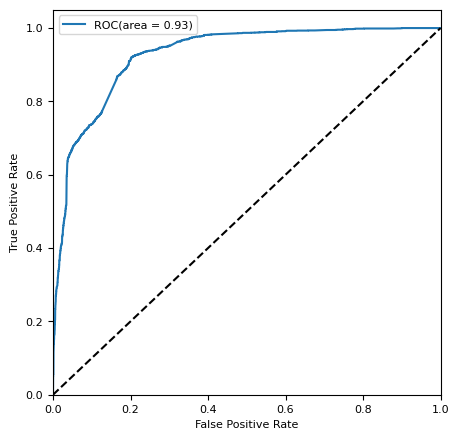

In [129]:
draw_roc(y_train_final['Converted'],y_train_final['Converted_Prob'])

### ROC Curve is 0.93. This shows a good predictive model

#####  Finding Optimal Model:  We must balance the 'sensitivity' & 'specificity'

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_final.head()

,ProspectID,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5626,0.0,0.021563,0,1,0,0,0,0,0,0,0,0,0
1,8008,1.0,0.203994,0,1,1,1,0,0,0,0,0,0,0
2,2486,1.0,0.753728,1,1,1,1,1,1,1,1,1,0,0
3,8885,1.0,0.008920,0,1,0,0,0,0,0,0,0,0,0
4,3170,1.0,0.503536,1,1,1,1,1,1,1,0,0,0,0


##### Calculation for  accuracy, sensitivity & specificity for probabilities

In [132]:
# 
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

numberIter = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numberIter:
    confMatrix = metrics.confusion_matrix(y_train_final["Converted"], y_train_final[i] )
    summTotal=sum(sum(confMatrix))
    accuracy = (confMatrix[0,0]+confMatrix[1,1])/summTotal
    
    speci = confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1])
    sensi = confMatrix[1,1]/(confMatrix[1,0]+confMatrix[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384338  1.000000  0.000000
0.1   0.1  0.766949  0.975092  0.637012
0.2   0.2  0.808380  0.946917  0.721897
0.3   0.3  0.840395  0.925684  0.787153
0.4   0.4  0.842122  0.901592  0.804996
0.5   0.5  0.846516  0.863618  0.835840
0.6   0.6  0.841180  0.711719  0.921998
0.7   0.7  0.841023  0.656595  0.956156
0.8   0.8  0.783271  0.482646  0.970941
0.9   0.9  0.725204  0.303389  0.988529


##### Plot accuracy sensitivity and specificity for various probabilities

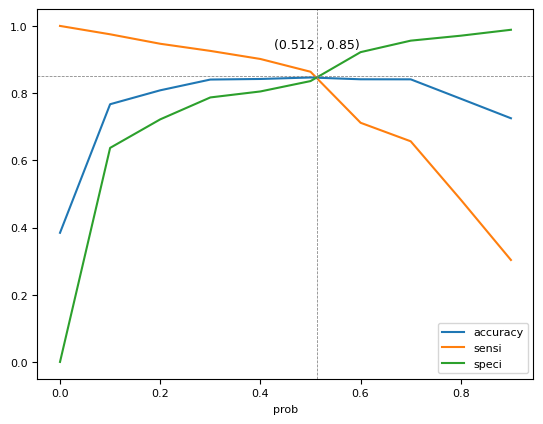

In [133]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


- The point 0.512 is approx point where all 3 curves meet.
- <b>Optimal cutoff point</b> = 0.512, for probability threshold. 

In [134]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda X:1 if X > 0.49 else 0)

y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob,Final_Predicted
0,5626,0.0,0.021563,0
1,8008,1.0,0.203994,0
2,2486,1.0,0.753728,1
3,8885,1.0,0.008920,0
4,3170,1.0,0.503536,1


##### Calculating all metrics using confusion matrix for Train

In [135]:
# UDF for all Logistic Regression Metrics
def logistic_reg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [136]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
print("="*60,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("="*60,"\n")

# Using UDF to calculate all metrices of logistic regression
logistic_reg_all_metrics(confusion_matrix)

print("\n")
print("="*60,"\n")


Confusion Matrix
[[3263  660]
 [ 319 2130]] 


True Negative                    :  3263
True Positive                    :  2130
False Negative                   :  319
False Positve                    :  660
Model Accuracy                   :  0.8464
Model Sensitivity                :  0.8697
Model Specificity                :  0.8318
Model Precision                  :  0.7634
Model Recall                     :  0.8697
Model True Positive Rate (TPR)   :  0.8697
Model False Positive Rate (FPR)  :  0.1682





##### Let us now look at the Precision and recall tradeoff

In [137]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

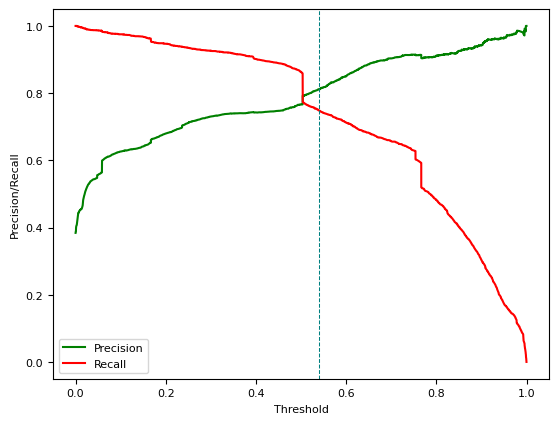

In [138]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.54, color='teal',linewidth = 0.75, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

#### This graph shows the trade-off between Precision and Recall.


## Making Predictions on Test Set

In [139]:
X_test[maxvar] = scaler.transform(X_test[maxvar])

In [140]:
col = X_train_rfe.columns

In [141]:
# Add Constant
X_test_sm = sm.add_constant(X_test[col])

In [142]:
# Making predictions on the test set and storing in the variable 'y_test_pred'
y_test_pred = logm5.predict(X_test_sm)

In [143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6758,0.892336
7461,0.172612
4359,0.766513
3738,0.012700
854,0.941148


In [144]:
# renaming the column
y_pred_1.rename(columns={0:'Converted_Prob'}, inplace=True)

In [145]:
# Creating a dataframe and adding y_test in that
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
6758,1.0
7461,0.0
4359,1.0
3738,0.0
854,1.0


In [146]:
# Adding Prospect id to index
y_test_df['ProspectID'] = y_test_df.index

In [147]:
# removing index from both dataframe to place them side by side
y_test_df.reset_index(drop = True, inplace = True)
y_pred_1.reset_index(drop = True, inplace = True)

In [148]:
# Merging the two dataframe in a single dataFrame
y_test_pred_final = pd.concat([y_test_df,y_pred_1], axis = 1)
y_test_pred_final.head()

,Converted,ProspectID,Converted_Prob
0,1.0,6758,0.892336
1,0.0,7461,0.172612
2,1.0,4359,0.766513
3,0.0,3738,0.012700
4,1.0,854,0.941148


In [149]:
# rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(columns=['ProspectID','Converted','Converted_Prob'])

In [150]:
y_test_pred_final['Converted'] = y_test_pred_final['Converted'].astype(int)

In [151]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Converted_Prob'].map(lambda X:1 if X > 0.49 else 0)
y_test_pred_final.head()

,ProspectID,Converted,Converted_Prob,Final_Predicted
0,6758,1,0.892336,1
1,7461,0,0.172612,0
2,4359,1,0.766513,1
3,3738,0,0.012700,0
4,854,1,0.941148,1


In [152]:
# Check the overall metrix accuracy score
print('Accuracy : ',metrics.accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Final_Predicted']))

Accuracy :  0.8432808495056756


In [153]:
# Finding Confusion metrics for 'y_test_pred_final'
confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['Final_Predicted'])
print("="*80,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("="*80,"\n")

# Using UDF to calculate all metrices of logistic regression
logistic_reg_all_metrics(confusion_matrix)

print("\n")
print("="*80,"\n")


Confusion Matrix
[[3263  660]
 [ 319 2130]] 


True Negative                    :  3263
True Positive                    :  2130
False Negative                   :  319
False Positve                    :  660
Model Accuracy                   :  0.8464
Model Sensitivity                :  0.8697
Model Specificity                :  0.8318
Model Precision                  :  0.7634
Model Recall                     :  0.8697
Model True Positive Rate (TPR)   :  0.8697
Model False Positive Rate (FPR)  :  0.1682





# <strong><span style="color:GREEN">Conclusion </span></strong> 

## Observations for Train - Test
### <span style="color:MAGENTA">Training Data:</span>         
- Accuracy: 84.64 % | Sensitivity: 86.97 % | Specificity: 83.18 %


### <span style="color:MAGENTA">Test Data:</span>
- Accuracy: 84.64 % | Sensitivity: 86.97 % | Specificity: 83.18 %

 

<strong><span style="color:Blue">NOTE:</span></strong> The metrics are almost close, hence we can conclude that the model is performing consistently across all evaluation metrics in both test and train datasets.

- The model has a sensitivity of 86.97% in both training and  testing set, using an Optimal cutoff point = 0.512
- Sensitivity=86.97% indicates how many leads our model was able to identify correctly from the potential leads which converted
- <b>The CEO of X Education had set a target sensitivity of around 80%</b>
- The model achieved an accuracy of 84.64%, which is as expected by the objectives stated for the case study.
